# Titanic Dataset EDA

Este cuaderno es un ejemplo de análisis exploratorio de datos (EDA por sus siglas en inglés) ejecutado sobre el dataset Titanic donde se recogen datos de los pasajeros del Titanic frente a la variable de si sobrevivieron o no.

El ejercicio consiste en plotear gráficas interesantes buscando patrones interesantes que pudieran ser útiles en el futuro y tratando de desentrañar la historia que cuentan los datos.

---

## Línea de importación de librerías

In [1]:
# Librerías estándar de análisis de datos
import numpy as np
import pandas as pd

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

## Exploración básica del dataset

### Estas son las variables por entrada que contiene este dataset

* __PassengerId__ = Passenger identificator number
* __Pclass__ = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* __survival__ = Survival (0 = No; 1 = Yes)
* __name__ = Name
* __sex__ = Sex
* __age__ = Age
* __sibsp__ = Number of Siblings/Spouses Aboard
* __parch__ = Number of Parents/Children Aboard
* __ticket__ = Ticket Number
* __fare__ = Passenger Fare (British pound)
* __cabin__ = Cabin
* __embarked__ = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [2]:
# Una variable para la ruta, buenas prácticas
path_to_data = "./titanic_dataset.csv"

# Importamos el dataset y comprobamos que está correcto
df = pd.read_csv(path_to_data, index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Información sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Se ha perdido la edad para bastantes de los casos. Faltan muchísimos datos en la columna cabin, y unos pocos en embarked. En el futuro habrá que lidiar con ello. De momento podemos contar los valores que faltan:

In [4]:
df.isnull().sum(axis = 0)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Solo faltan dos embarked. En edad faltan unos cuantos más, 177. El mayor problema con esto es cabon, donde nos faltan 687

In [5]:
# Análisis estadístico básico
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Una variable puede ser de dos tipos:
* __Categórica__: Es una variable que puede tomar un valor de un conjunto de valores limitados, asociados a una cualidad del dato y sin un orden lógico. Estas a su vez pueden ser:
    - __Binarias__: Pueden tomar uno de dos valores. Se suelen denominar clase positiva y clase negativa. Suelen representarse como Verdadero o Falso, y como 0 o 1, pese a lo cual no deben ser confundidas con variables numéricas
    - __Politómicas__: Pueden tomar más de dos valores.   
* __Numérica__: Son aquellas que vienen representadas por un número, que dependen de un orden lógico y con las que se pueden hacer operaciones aritméticas. A su vez, pueden ser de dos tipos:
    - __Continuas__: Entre dos valores dados, podemos encontrar infinitos valores
    - __Discretas__: Cuando entre dos valores dados, no puede tomar valores intermedios

In [6]:
categoricas = ["Survived", "Sex", "Embarked", "Pclass"]
numericas = ["Age", "Fare", "SibSp", "Parch"]

In [7]:
df[numericas].describe()

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


In [8]:
for col in categoricas:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

Column name: Survived
0    549
1    342
Name: Survived, dtype: int64

Column name: Sex
male      577
female    314
Name: Sex, dtype: int64

Column name: Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64

Column name: Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64



## Gráficos interesantes

### Barplots

Con el siguiente gráfico categórico de barras podemos ver la relación entre los valores de la variable categórica sex discriminadas por la variable survived.

El resultado es una comparación por sexos de los pasajeros que sobrevivieron y los que murieron. Podemos concluir dos cosas:
* En el Titanic viajaban más hombres que mujeres
* Murieron en proporción muchísimos más hombres que mujeres

¿Alguna hipótesis de por qué?

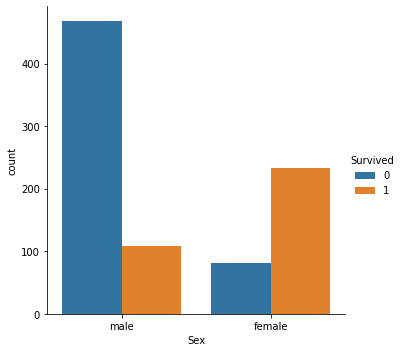

In [9]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = df)

Lo mismo que lo anterior, pero comprobando las ciudades de embarque. Dos cosas interesantes:
* La mayoría aplastante de gente embarcó en Southampton. ¿Para qué podríamos usar esto?
* Aunque no tan acentuado como en el caso de los sexos, se ve claro que a mayor clase, más probabilidad de sobrevivir

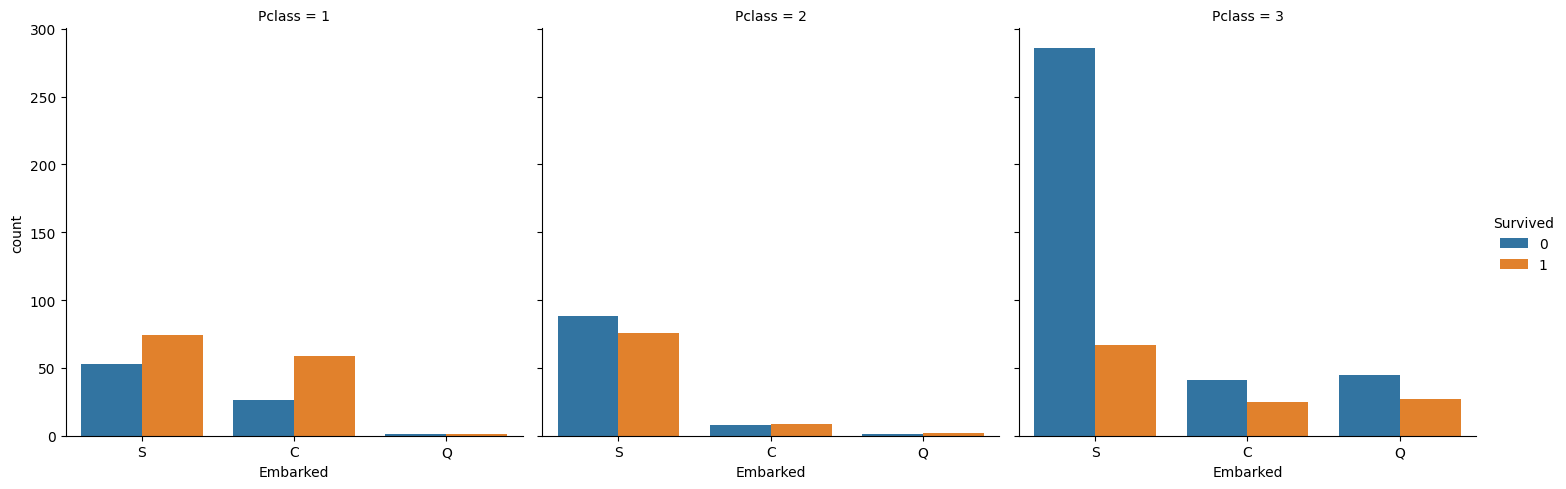

In [10]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = df)

### ViolinPlot

Un gráfico de violines nos permite visualizar una variable categórica (en este caso, sex) frente a una continua (age) y en este caso discriminar los resultados por survived. Cosas interesantes:
* Murieron muchos hombres y mujeres jóvenes
* Se salvaron sobre todo personas de mediana edad
* Murieron más niñas de las que se salvaron, pero se salvaron más ancianas de las que murieron
* Se salvaron muchísimos más niños en proporción a los que murieron. Sin embargo murieron más ancianos de los que se salvaron, aunque había pocos en general

<AxesSubplot:xlabel='Sex', ylabel='Age'>

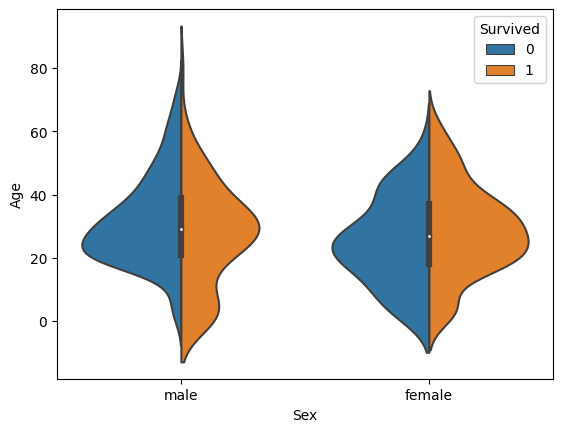

In [11]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = df, split = True)

### Scatterplots

Un scatter plot nos puede mostrar la relación entre variables numéricas y también la presencia de outliers.

Por ejemplo, aquí podemos ver la edad frente al precio del billete, a ver si las personas mas mayores pagan más, y discriminados por clases:

* No Hay una correlación lineal entre la edad y el precio
* Por algún motivo, un par de personas de primera pagaron notablemente más que el resto (outliers)
* Hay mucha más varianza en el precio para primera clase, podría estudiarse por separado
* El precio entre segunda y tercera es bastante similar

Al desglosar comprobamos la hipótesis. Además podemos ver que los precios, especialmente de segunda y tercera, van por tramos

<AxesSubplot:xlabel='Age', ylabel='Fare'>

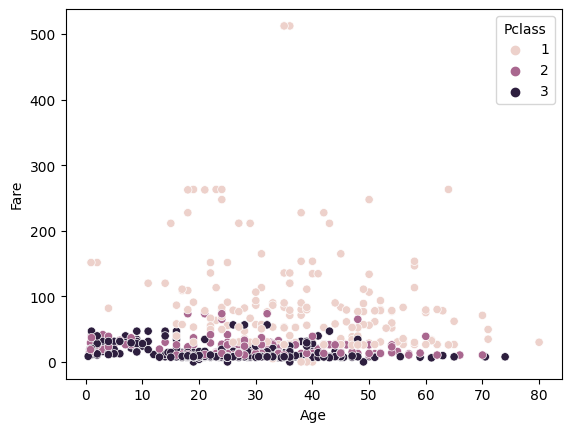

In [12]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Pclass")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

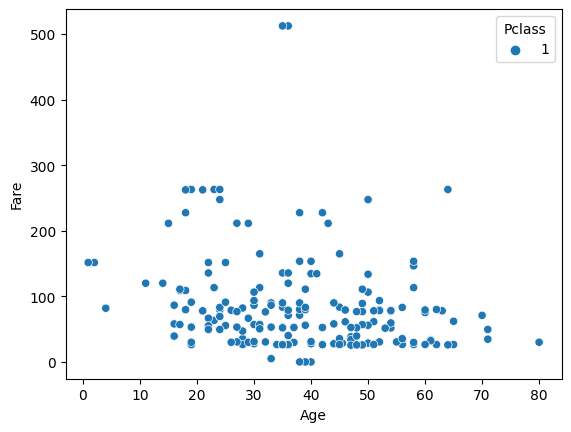

In [13]:
sns.scatterplot(data=df[df["Pclass"]==1], x="Age", y="Fare", hue="Pclass")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

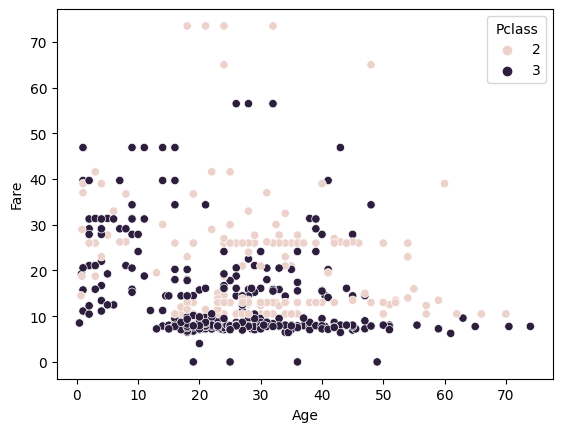

In [14]:
sns.scatterplot(data=df[df["Pclass"]!=1], x="Age", y="Fare", hue="Pclass")

Este método nos puede venir genial para ver de un vistazo posibles correlaciones entre las variables numéricas de un conjunto de datos. En este caso no parece ser interesante, pero eso solo lo sabemos porque lo hemos visto

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Age', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Fare', ylabel='SibSp'>,
        <AxesSubplot:xlabel='SibSp', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Parch', ylabel='SibSp'>],
       [<AxesSubplot:xlabel='Age', ylabel='Parch'>,
        <AxesSubplot:xlabel='Fare', ylabel='Parch'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', ylabel='Parch'>]], dtype=object)

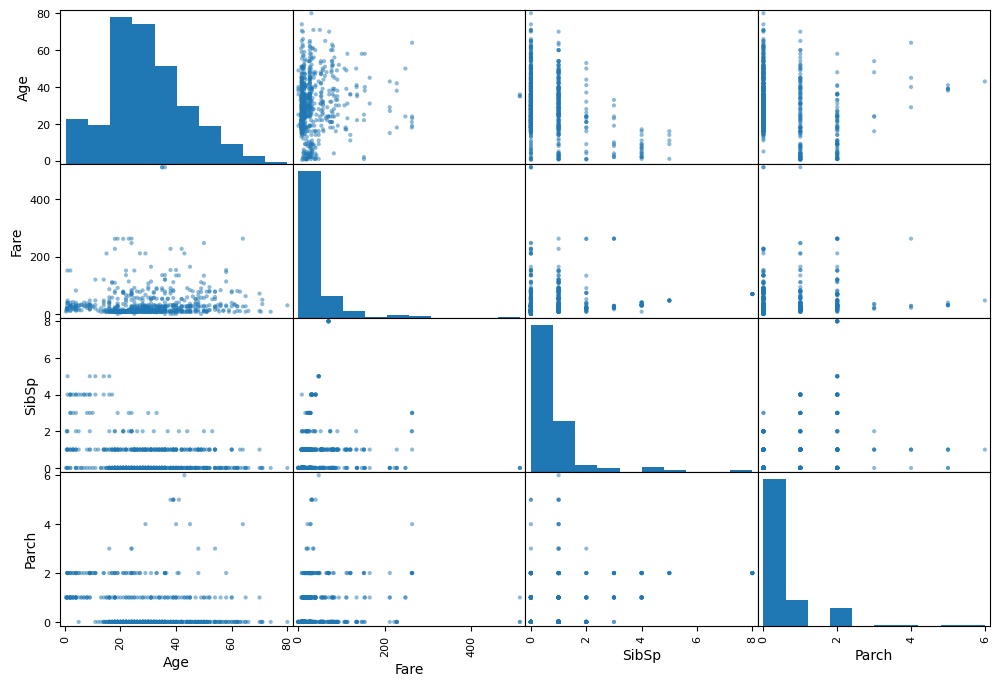

In [15]:
pd.plotting.scatter_matrix(df[numericas], figsize=(12,8))

### Heatmaps

Vamos a ver un par de ejemplos de mapas de calor, muy muy útiles para ver correlaciones entre las variables. También podemos mostrar otro tipo de relaciones de manera visual.

In [16]:
# El método .corr() nos muestra una tabla de correlaciones en el dataset para las variables continuas
# La diagonal siempre es 1 porque cada variable correlaciona en 1 consigo misma, evidentemente
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

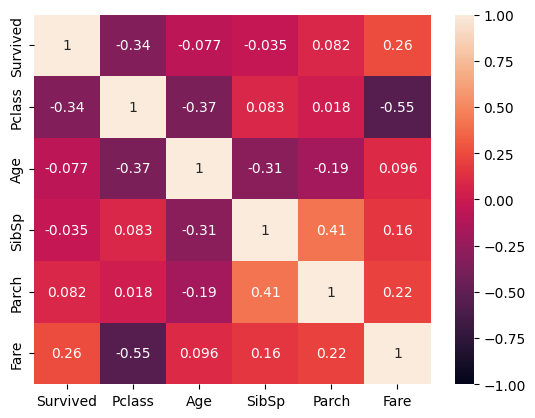

In [17]:
# A partir de la tabla de correlación, obtenemos el mapa de calor 
sns.heatmap(df.corr(), vmin=-1., vmax=1., annot=True)

<AxesSubplot:>

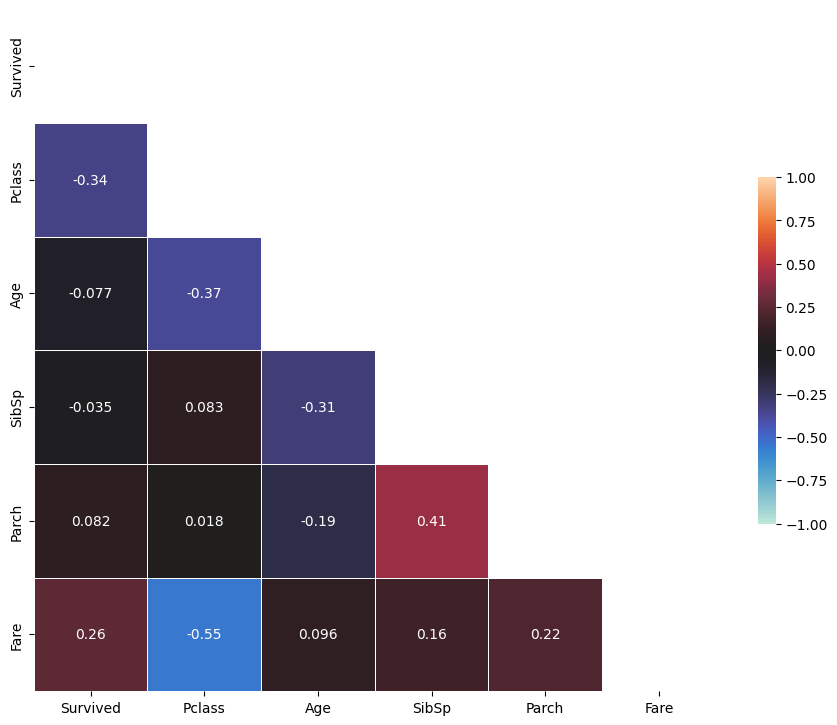

In [18]:
# Ahora igual pero más bonito

# Generamos una máscara para no duplicar lops valores
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Ploteamos el heatmap
sns.heatmap(df.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<AxesSubplot:>

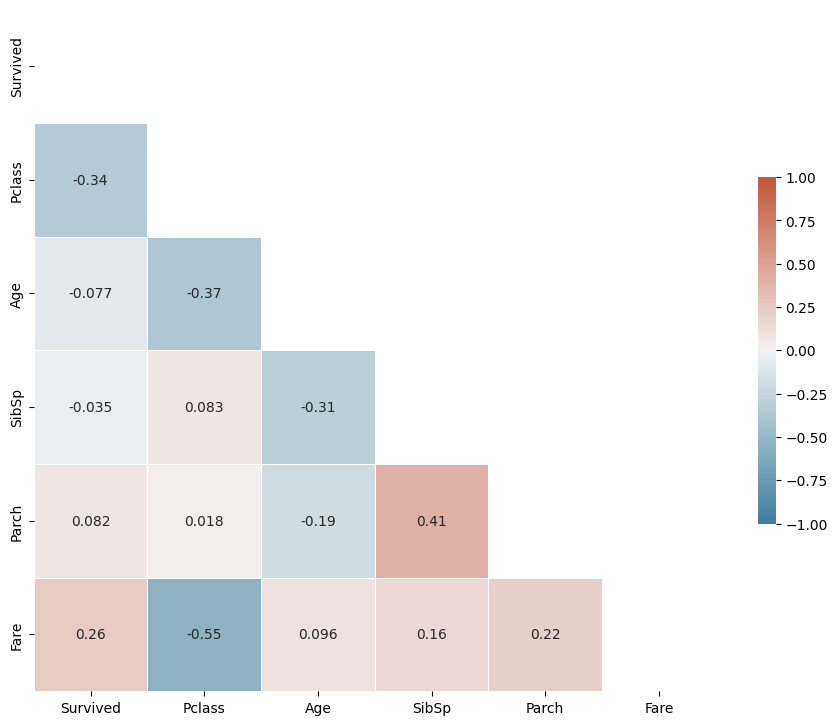

In [19]:
# Ahora igual pero otros colores
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Este último nos muestra la relación entre la supervivencia y la clase, aunque es menos interesante que el de correlacion.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

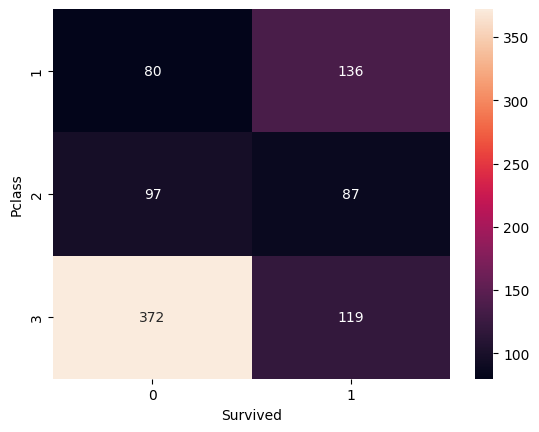

In [20]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

Por último decir que esto también es un recurso imprescindible para leer matrices de confusión, que veremos más adelante.

### Histograms

Gráfico fundamental para estudiar las distribuciones de las variables numéricas. La distribución es importante porque nos ayuda a detectar outliers. También, los modelos se benefician mucho de recibir los datos escalados y normalizados.

Un gráfico normalizado es aquel que sigue una distribución gaussiana, con la media en 0 y la desviación típica en 1

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

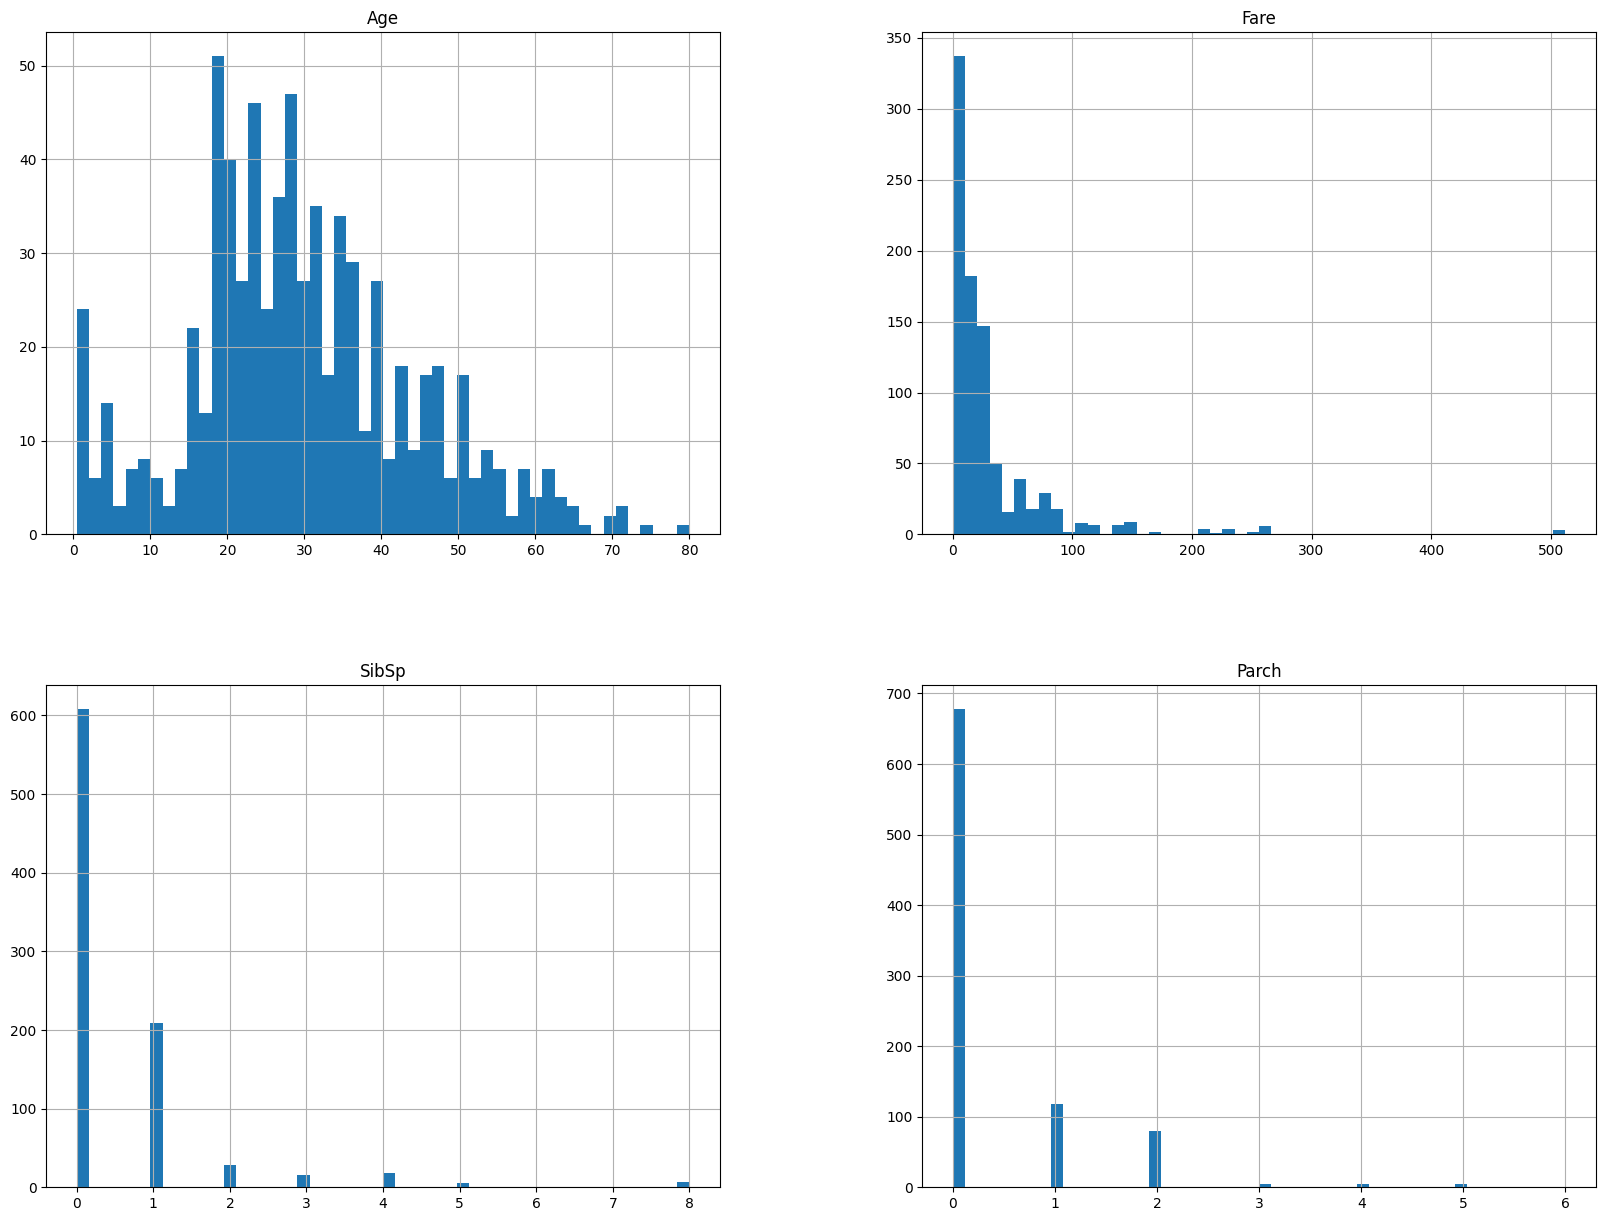

In [21]:
df[numericas].hist(bins=50, figsize=(20,15))

<AxesSubplot:xlabel='Age', ylabel='Count'>

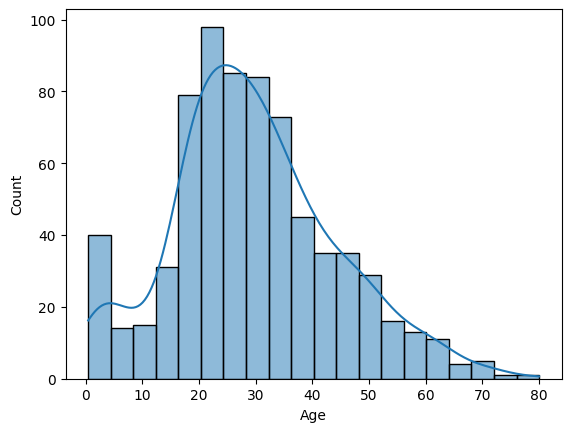

In [22]:
sns.histplot(data=df, x="Age", kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

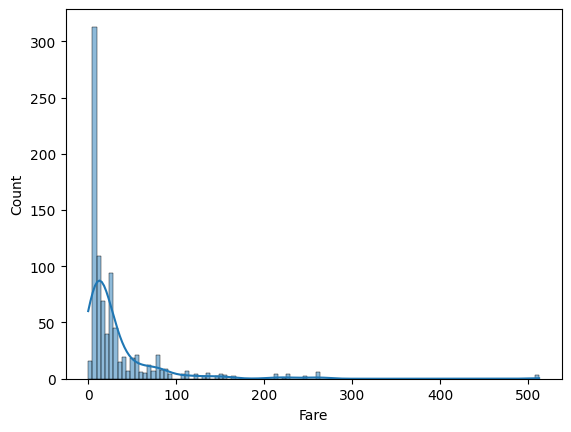

In [23]:
sns.histplot(data=df, x="Fare", kde=True)

Del primer gráfico podemos ver que quizá lo único interesante para representar en forma de histograma es la edad y el precio del billete. 

Con la distribución de edades podemos ver __mas o menos__ una distribución gaussiana, con algo de cola hacia la derecha. Cabe remarcar que hay un pico de edad en los 0 años, parece que embarcaron muchos bebés. 

En el caso del precio del billete, vemos que la cola es mucho más grave. Esto remarca el problema de los outliers. Si nos fijamos, aunque se ve pequeño, el problema son esos pasajeros que pagaron mas de 500. Vamos a ver la distribución sin ellos

### Pieplot

Por lo general no se usan, porque son muy engañosos, pero os enseño un ejemplo:

([<matplotlib.patches.Wedge at 0x22210b94610>,
 [Text(-0.17571616709359641, 1.0858746836637898, ''),
  Text(-0.5160762002061153, -0.9714243951954356, ''),
  Text(0.8765111456658484, -0.6646263698677192, '')])

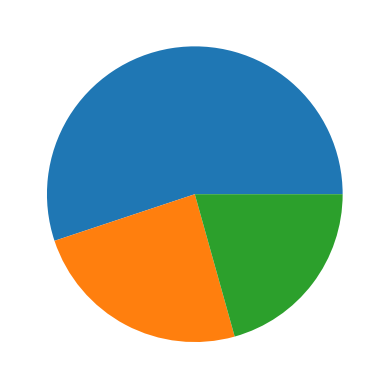

In [24]:
plt.pie(df["Pclass"].value_counts())

# Ingeniería de características

Vamos a referirnos por ingeniería de características a todo lo que tenga que ver con transformaciones en el dataset, ya sea modificando, eliminando o añadiendo características.

Aunque lo esté separando del EDA, es habitual intercalarlo, y algo así haremos considerando que para comprobar que una transformación es correcta, o que los gráficos cambian como necesitamos

Además, aunque dé algunas directrices, las transformaciones van a depender de cada conjunto de datos, a pesar de las cosas comunes.

### Selección de variables 1.

__No__ todas las columnas de nuestro dataset van a ser siempre __variables__. Las variables van a ser aquellas características, numéricas o cualitativas, que pueden ser medidas o contadas y que tienen algún impacto en nuestra salida. El índice del dataset __NO__ es una variable. El ticket tampoco lo es. El nombre tampoco, no tiene ningún impacto en la esperanza de supervivencia. La gran mayoría de veces esto se ve a simple vista, tenemos que prescindir de ellas

Volveremos a repetir este paso más adelante tantas veces como sea necesario, ya que veremos (quizá no en este dataset, pero si en otros) que a veces tenemos variables que es mejor descartar por poco impacto o por otros motivos.

In [25]:
df.drop(["Name", "Ticket"], axis=1, inplace=True)

In [26]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

En casos de aprendizaje supervisado, tenemos que separar nuestra variable objetivo (target, y, variable dependiente), de las variables independientes. Cuando entrenemos el modelo, esto servirá para diferenciar, a la hora de entrenar el modelo, qué variable tiene que predecir, y con qué variables puede hacerlo. Por lo general, las variables independientes forman una matriz (y por tanto se expresan con __X mayúscula__ y la variable dependiente forma un vector, y por tanto __y minúscula__)

__PERO__ como vamos a seguir manipulando los datos y probablemente a eliminar registros, y si elimino un registro quiero que se elimine también su etiqueta, voy a dejar esto anotado y lo haremos al final

In [27]:
# y = df["Survived"]
# X = df.drop("Survived", axis=1)

In [28]:
df["Survived"].head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [29]:
df["Survived"].shape

(891,)

In [30]:
df.drop("Survived", axis=1).head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,NaN,S
2,1,female,38.0,1,0,71.2833,C85,C
3,3,female,26.0,0,0,7.9250,NaN,S
4,1,female,35.0,1,0,53.1000,C123,S
5,3,male,35.0,0,0,8.0500,NaN,S


In [31]:
df.drop("Survived", axis=1).shape

(891, 8)

Para que veáis el tema vector-matriz:

In [32]:
df["Survived"].to_numpy()

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [33]:
df.drop("Survived", axis=1).to_numpy()

array([[3, 'male', 22.0, ..., 7.25, nan, 'S'],
       [1, 'female', 38.0, ..., 71.2833, 'C85', 'C'],
       [3, 'female', 26.0, ..., 7.925, nan, 'S'],
       ...,
       [3, 'female', nan, ..., 23.45, nan, 'S'],
       [1, 'male', 26.0, ..., 30.0, 'C148', 'C'],
       [3, 'male', 32.0, ..., 7.75, nan, 'Q']], dtype=object)

En sí mismos son conceptos matemáticos compejos. No vamos a ahondar en la profundidad así que os lo defino de manera __MUY__ superficial, lo justo y necesario para poder apañarnos con ello (profundizar queda a vuestra discrección si lo consideráis necesario)

Podemos dejarlo en que son representaciones de datos en espacios matemáticos que pueden ser multidimensionales. Como podéis observar, la diferencia es que nuestro vector __y__ solo tiene una dimensión (lo vemos en el y.shape) con 891 valores, mientras que la matriz tiene dos dimensiones (una dimensión representa nuestras filas y la otra las columnas). En ambos casos, los valores no son independientes, sino que cada valor tiene un impacto en todo el objeto matemático que es la matriz o el vector. La posición es importante, y modificar un valor modifica todo el objeto.

El campo de las matemáticas que trata estos conceptos es el álgebra lineal, que es justamente hacia lo que se orienta numpy. No es necesario que nosotros seamos matemáticos y sepamos los pormenores de los cálculos que vamos (aunque es recomendable, evidentemente), pero si que tenemos que entender el concepto de las cosas que veamos. 

Por el momento, ya tenemos los datos preparados para empezar a transformar

### Imputacion de valores perdidos

No se puede operar con valores que no existen. Por tanto si intentas operar con la __NADA__ el programa te dará a error. Pandas está escrito encima de Numpy y Numpy incorpora una clase que representa los valores perdidos. Es la clase __NaN__ (significa Not a Number). A veces es posible que os lo encontréis como la clase de python __None__.

Una tercera posibilidad, bastante habitual, es que el valor perdido esté __"disfrazado"__. Muchas veces, el proceso de recogida de datos tiene fallos que hace que quien tome la medida no tenga la posibilidad o no sepa introducir un valor nulo. A veces, en el caso de las variables que contienen elementos tipo string podemos encontrar valores como "?", "???", "No responde", "sdafhaslkdfh", "" o ya depende de la creatividad de las personas que lo hayan rellenado, que puede ser infinita. Por eso es importante comprobar qué valores contienen esas variables. 

Para variables numéricas ocurre lo mismo, solo que el valor perdido puede depender del contexto. Un 0 puede significar un valor perdido en caso de una columna que mida el ritmo cardiaco (si sabes que el dataset no contiene personas fallecidas), pero un 0 puede ser un valor válido si la columna es la cantidad de azúcar de un elemento, por ejemplo. Si miramos las edades de una persona y un valor es 9999 probablemente sea un valor perdido. Es importante entender los datos.

In [34]:
# Miramos los valores que están tomando las variables categóricas
for col in ["Cabin", "Embarked", "Sex", "Pclass"]:
    print(f"Valores en '{col}':")
    for i in df[col].unique():
        print("\t"+str(i))
    print()

Valores en 'Cabin':
	nan
	C85
	C123
	E46
	G6
	C103
	D56
	A6
	C23 C25 C27
	B78
	D33
	B30
	C52
	B28
	C83
	F33
	F G73
	E31
	A5
	D10 D12
	D26
	C110
	B58 B60
	E101
	F E69
	D47
	B86
	F2
	C2
	E33
	B19
	A7
	C49
	F4
	A32
	B4
	B80
	A31
	D36
	D15
	C93
	C78
	D35
	C87
	B77
	E67
	B94
	C125
	C99
	C118
	D7
	A19
	B49
	D
	C22 C26
	C106
	C65
	E36
	C54
	B57 B59 B63 B66
	C7
	E34
	C32
	B18
	C124
	C91
	E40
	T
	C128
	D37
	B35
	E50
	C82
	B96 B98
	E10
	E44
	A34
	C104
	C111
	C92
	E38
	D21
	E12
	E63
	A14
	B37
	C30
	D20
	B79
	E25
	D46
	B73
	C95
	B38
	B39
	B22
	C86
	C70
	A16
	C101
	C68
	A10
	E68
	B41
	A20
	D19
	D50
	D9
	A23
	B50
	A26
	D48
	E58
	C126
	B71
	B51 B53 B55
	D49
	B5
	B20
	F G63
	C62 C64
	E24
	C90
	C45
	E8
	B101
	D45
	C46
	D30
	E121
	D11
	E77
	F38
	B3
	D6
	B82 B84
	D17
	A36
	B102
	B69
	E49
	C47
	D28
	E17
	A24
	C50
	B42
	C148

Valores en 'Embarked':
	S
	C
	Q
	nan

Valores en 'Sex':
	male
	female

Valores en 'Pclass':
	3
	1
	2



Ningún valor extraño, a parte del NaN, que ya es un valor perdido en sí mismo. Los valores anómalos en variables numéricas que podríamos entender como perdidos deberíamos haberlos detectado en el EDA, saltan a la vista como outliers en gráficos de dispersión, como valores aislados en gráficos de distribución y como puntos fuera de la caja en los gráficos de cajas y bigotes (veremos después un ejemplo de estos gráficos)

In [35]:
# Ahora buscamos los NaN como tal
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Como vemos, tenemos 3 casos. Veremos cómo se puede solucionar

Estos son los posibles tratamientos para los valores perdidos:

1. __Eliminar los registros con valores perdidos__: __CUIDADO__ con esta opción!!!!!! Sólo, y repito __SOLO__ es recomendable cuando hay __pocos valores perdidos__ y además se ven como una __constante por registro__ (es decir, si veis que por lo general están todos los datos, pero de pronto veis que en una fila hay un registro al que le faltase 'Sex', 'Fare', 'Cabin', 'Embarked' todos a la vez)

2. __Eliminar las columnas con valores perdidos__: Esta es un poco más común. Aún así cuidado, sigue sin ser lo mejor. Es recomendable cuando veais que el procentaje de valores perdidos en una columna es elevado, porque sería complicado deducir los que faltan

3. __Dejar el valor perdido como posibilidad__: Este dataset corresponde a los años 20 y no es el caso. Pero si en un dataset moderno hubiese valores perdidos en la columna "Sex" podemos entender que corresponden a personas que no quisieron responder, por intimidad o porque no se han sentido representadxs por las opciones. En ese caso podríamos sustituir los valores perdidos por "Otro" o "Desconocido", ya que el hecho de que el valor falte es informativo. Si te falta el dato de cuanto dinero se ha gastado el visitante de un centro comercial en una tienda dada, podrías entender que la persona no entró en esa tienda, y por tanto podrías sustituir el valor perdido por 0 (que es justo lo que el cliente ha gastado en la tienda en la que no ha entrado). Es cuestión, de nuevo, de entender los datos.

4. __Rellenar los valores perdidos con un valor estándar__: Si hay pocos valores perdidos y no podemos deducirlos, puede ser útil rellenarlos con algún indicador estadístico representativo. Generalmente, la __media__ para valores numéricos y la __moda__. Recordad que "generalmente" no significa "siempre", en cualquier caso siempre hay que estudiar el resultado y volver atrás si la cosa sale mal

5. __Inferir los valores perdidos__: Es la técnica pro, pero la más difícil y más tiempo lleva. La idea es que igual que entrenamos un modelo de inteligencia artificial para predecir la variable _y_, podemos usar un modelo para predecir los valores que faltan de una columna, tomando para entrenar los valores que no faltan. Es habitual usar modelos ligeros, como KNN o Regresión Lineal.

TIP: Scikit-Learn, una librería de python para machine learning que veremos en profundidad, contiene un submódulo llamado "impute" que contiene funciones preparadas para llenar valores perdidos. Vamos a ver un ejemplo rellenando las edades con la técnica de KNN (que veremos más en profundidad cuando veamos modelos de clasificación), que es probablemente el modelo de machine learning más sencillo que hay

In [36]:
# Comprobamos el porcentaje de valores perdidos para cada caso
lost_cabin = df["Cabin"].isnull().sum() / len(df["Cabin"])
lost_embarked = df["Embarked"].isnull().sum() / len(df["Embarked"])
lost_age = df["Age"].isnull().sum() / len(df["Age"])

print(f"Porcentaje de valores perdidos en Cabin: {round(lost_cabin, 2)*100}%")
print(f"Porcentaje de valores perdidos en Embarked: {round(lost_embarked, 2)*100}%")
print(f"Porcentaje de valores perdidos en Age: {round(lost_age, 2)*100}%")

Porcentaje de valores perdidos en Cabin: 77.0%
Porcentaje de valores perdidos en Embarked: 0.0%
Porcentaje de valores perdidos en Age: 20.0%


In [37]:
# En el caso de Cabin, no hay discusión, 77% es una barbaridad
df.drop("Cabin", axis=1, inplace=True)

In [38]:
# En el caso de Embarked, los valores perdidos (solo dos) son insignificantes. Tiene sentido rellenar con la moda
embarked_mode = df["Embarked"].mode()[0] # Especificar el 0 es importante, si no, el resultado es un Series

df["Embarked"].fillna(embarked_mode, inplace=True)

In [39]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Vamos con el caso delicado. 20% es bastante, pero me atrevo a rellenar utilizando KNN. Creo que para este caso, siendo un valor numérico, sería más adecuanda una regresión lineal, pero KNN me debería dar un resultado bastante digno y así lo veis

<AxesSubplot:xlabel='Age', ylabel='Count'>

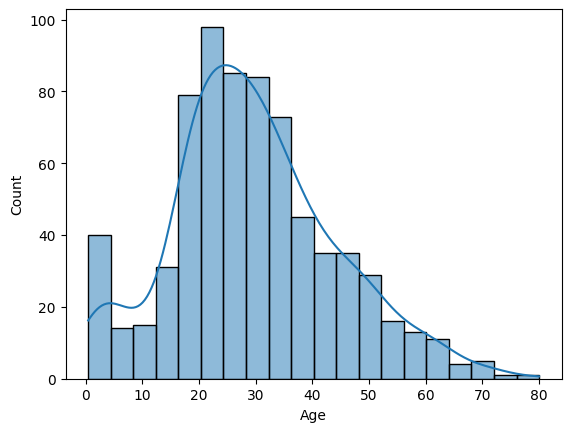

In [40]:
# Distribución antes de imputar
sns.histplot(data=df, x="Age", kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

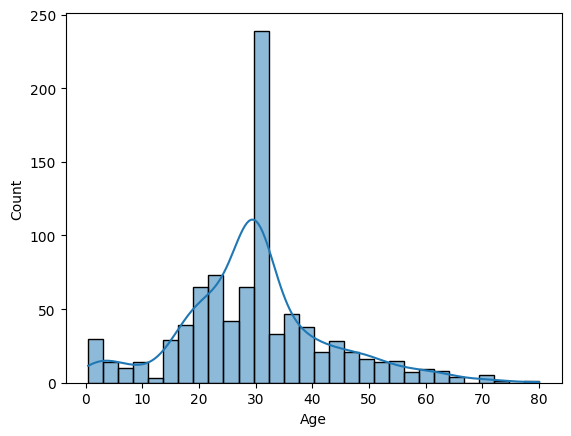

In [41]:
# Si imputara usando la media, vemos que la distribución varía demasiado
sns.histplot(data=df["Age"].fillna(df["Age"].mean()), kde=True)

In [42]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

# Tenemos que apartar la varaible objetivo o etiqueta para que no la tenga en cuenta, sería trampa ya que cuando
# nos lleguen datos nuevos no la vamos a conocer

# Si le paso todas las características para que las tenga en cuenta, me dará un error
# Recordad LEER SIEMPRE LOS MENSAJES DE ERROR
# Para que quede más claro, voy a capturarlo e imprimirlo

try:
    df = imputer.fit_transform(df)
except Exception as e:
    print("Error!!!!")
    print(e)

Error!!!!
could not convert string to float: 'male'


In [43]:
# Como veis, no puede operar con las columnas que están en formato string. Eso tiene solución, habría que convertir esas
# variables a algo matemáticamente operable. Es posible hacerlo y en un caso real nos pararíamos a hacerlo ahora
# para poder aplicar el algoritmo, pero como esto es un cuaderno de ejemplo y donde estoy explicando paso a paso, usaremos
# solo las que ya estén en formato numérico

# Son Pclass, Age, SibSp, Parch y Fare

# Insisto en NO tener en cuenta la variable "Survived" porque es nuestro target!!

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [44]:
cols_toknn = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

df[cols_toknn] = imputer.fit_transform(df[cols_toknn])

In [45]:
# Funcionó ;)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

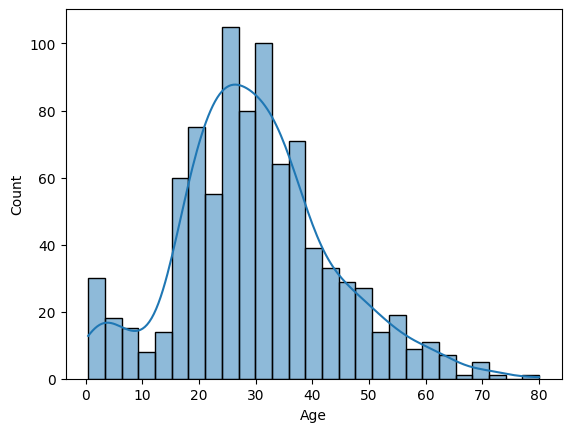

In [46]:
# Como veis, esto me rellena los valores perdidos y me mantiene ciertos indicadores estadísticos :)
sns.histplot(data=df, x="Age", kde=True)

__PD:__ Esta distribución tiene algo de cola hacia la derecha, a pesar de ser bastante normal, y quizá debiéramos anotar y considerar para después si los mayores de más o menos 70 no podrían ser considerados outliers

### Detección de outliers

Un outlier es un valor anómalo. Un valor puede ser anómalo por diversas circunstancias: errores al anotar un dato, malfuncionamiento de un sensor, circunstancias especiales, etc.

Detectar estas anomalías es crucial porque si entrenamos un modelo con datos anómalos el modelo llegará a extrapolar que la anomalía es un patrón, desviándose de los patrones reales y empeorando las predicciones. Además podemos detectar problemas ocultos. 

__Ej:__ En mi dataset tengo una columna "Temperatura" donde se repite muchas veces el valor -30000º. Este valor extremo evidentemente es un outlier. Analizando más en profundidad averiguo que esa medida se repite siempre en la misma zona. A parte de la información de que tengo un dato anómalo que debo tratar, puedo dar un aviso de que el termómetro en esa zona está estropeado.

Según su naturaleza, podemos distinguir dos tipos de outlier:

1. __Univariate:__ Es un valor extremo que se sale de los valores esperables o comunes para su propia variable. Son los más fáciles de detectar. Si tengo una columna "Edad", 150 es evidentemente un outlier. Si el dataset es el registro de asistentes a un parque infantil, donde el rango de edad comprende niños de 5 a 12 años, un registro de una persona de 50 es evidentemente un outlier. __RECORDAD__ que al igual que venimos repitiendo siempre, es importante entender los datos y su contexto porque muchas veces las conclusiones dependen de ello. Si tenemos precios de caramelos, un caramelo que cuesta 50€, siendo que no es lo normal, es un outlier. Si es el precio de los abonos transporte de distintas ciudades de Europa, probablemente 50€ es un valor válido. Depende, de nuevo, del contexto y de la relación con el resto de valores

2. __Multivariate:__ Es un valor que se considera anómalo por salirse de la tendencia en relación con el resto de variables. Son más difíciles de detectar, aquí brilla la importancia de hacer una buena exploración. Un ejemplo evidente. En este dataset (el titanic), no es un valor anómalo que en la columna Parch (número de padres o hijos a bordo) haya un 0 (puede haber gente que haya embarcado sin sus padres ni sus hijos). Tampoco lo es que haya un 0 en la columna "SibSP" (Alguien puede haber embarcado sin su marido o esposa o familiares). Tampoco es un outlier que haya algún chiquillo de menos de 5 años. Puede ser que alguien haya embarcado sin padres, hijos, esposa o marido ni familiares (y por tanto que las columnas "SibSp" __y__ "Parch" sean ambas 0). __PERO__ lo que sí que __sería extraño__ es que hubiera embarcado alguien menor de 5 años (o 10, o menor de 15) sin ningún tipo de familiar. Por tanto sería un outlier un registro donde la edad es menor que 5 y "Parch" y "SibSp" sean ambos iguales a 0, __aunque ninguna de esas variables independientemente sea un outlier__. Si dos varaibles tienen una relación lineal y un par de registros se salen claramente de esa tendencia, superando los límites del ruido esperable, __son outliers__. Si una varaible tiene una distribución normal y un par de valores están retorciendo esa distribución, son outliers. Etc. Para encontrar estos valores, es importante, como llevo diciendo todo el cuaderno, entender los datos y representar los datos gráficamente

In [47]:
# Como vemos, no se da el caso en que menores 5 no vengan acompañados
df[(df["Age"]<5) & (df["SibSp"]==0) & (df["Parch"] == 0)].value_counts().sum()

0

In [48]:
# Hay un menor de 10 no acompañado. ¿Seguramente un polizón? ¿Podemos considerarlo outlier?
df[(df["Age"]<10) & (df["SibSp"]==0) & (df["Parch"] == 0)].value_counts().sum()

1

In [49]:
# Es una niña de 5 años que viajaba sola en 3ª clase. Un solo caso, difícil de explicar. Pinta a outlier. Siendo uno solo,
# probablemente no sea un problema, pero vamos a anotarnos el id por si luego fuera necesario eliminarlo: 778
df[(df["Age"]<10) & (df["SibSp"]==0) & (df["Parch"] == 0)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
778,1,3.0,female,5.0,0.0,0.0,12.475,S


In [50]:
# Entre los 5 y los 15 hay varios niños viajando solos. ¿Cómo de común es esto en un transatlántico en 1912? A priori no lo
# voy a considerar outlier, pero se entiende
df[(df["Age"]<15) & (df["SibSp"]==0) & (df["Parch"] == 0)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
15,0,3.0,female,14.0,0.0,0.0,7.8542,S
732,0,3.0,male,11.0,0.0,0.0,18.7875,C
778,1,3.0,female,5.0,0.0,0.0,12.4750,S
781,1,3.0,female,13.0,0.0,0.0,7.2292,C


Con el gráfico de distribución anterior, nos fijamos en que quizá era posible considerar a la gente muy mayor como outlier. Vamos a examinarlo en más profundidad, no solo con el histplot sino también con un gráfico de cajas y bigotes.

__Tip para entender este gráfico__: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

<AxesSubplot:xlabel='Age', ylabel='Count'>

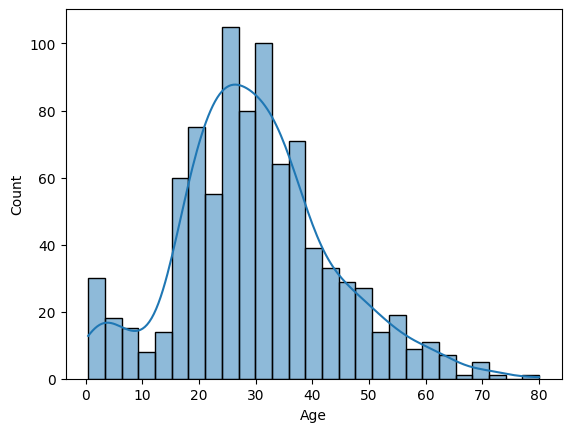

In [51]:
sns.histplot(data=df, x="Age", kde=True)

<AxesSubplot:xlabel='Age'>

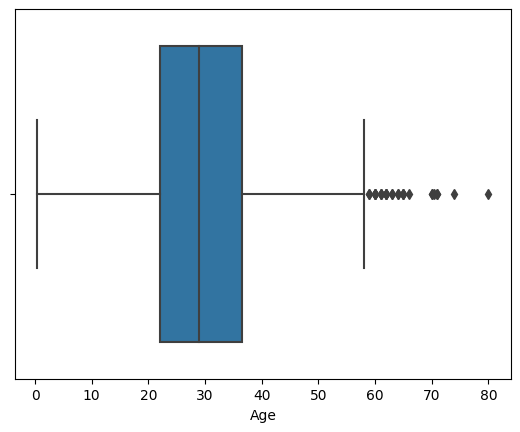

In [52]:
sns.boxplot(x=df["Age"])

Wow, según este gráfico (y es bastante claro), estamos considerando outlier todos los pasajeros por encima de aprox 59. Vamos a ver cuántos son

<AxesSubplot:xlabel='Age'>

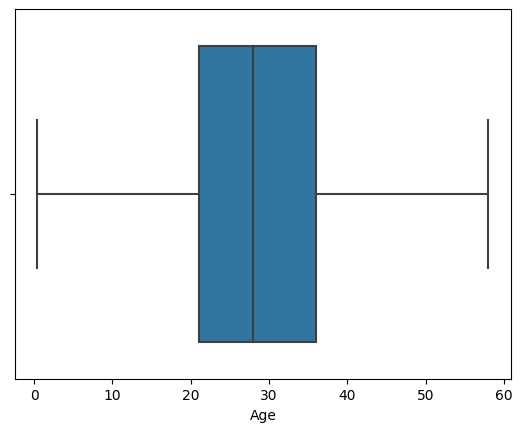

In [53]:
sns.boxplot(x=df[df["Age"]<59]["Age"])

In [54]:
# 26 pasajeros
len(df[df["Age"]>=59])

28

In [55]:
# Porcentaje sobre el total, un 3%. Es poquito. Lo consideraría outlier. Procedemos a eliminarlos
(round(len(df[df["Age"]>=59]) / len(df), 2)*100)

3.0

In [56]:
# Dos formas de hacerlo

# La más enrevesada = Aplicamos la función drop, sobre el eje 0 (las líneas), por los índices de los valores anómalos
df.drop(df[df["Age"]>=59].index, axis = 0, inplace = True)

# La más sencilla = Sobrescribimos el dataset con los valores no anómalos
df = df[df["Age"]<59]

In [57]:
len(df[df["Age"]>=59])

0

<AxesSubplot:xlabel='Age'>

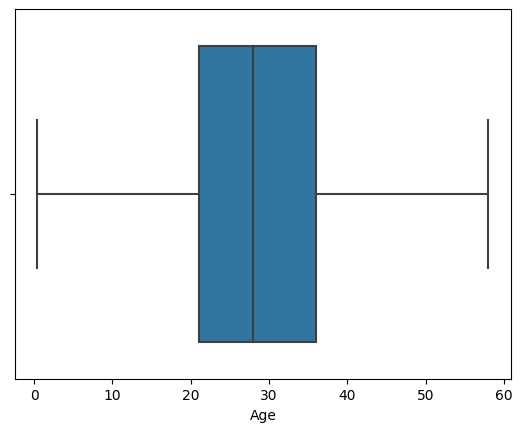

In [58]:
# Sin outliers!!
sns.boxplot(x=df["Age"])

<AxesSubplot:xlabel='Age', ylabel='Count'>

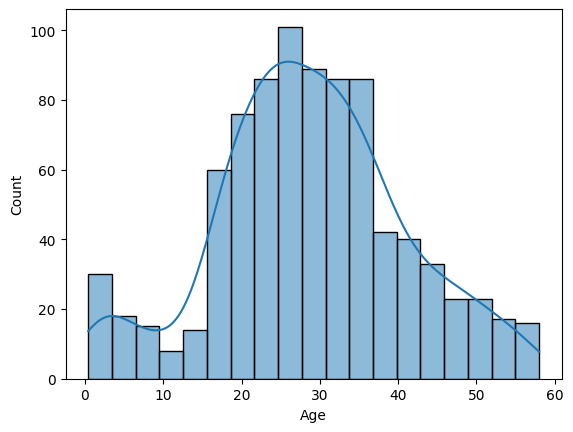

In [59]:
# Ahora sí que tenemos una distribución muy normal!!
sns.histplot(data=df, x="Age", kde=True)

<AxesSubplot:>

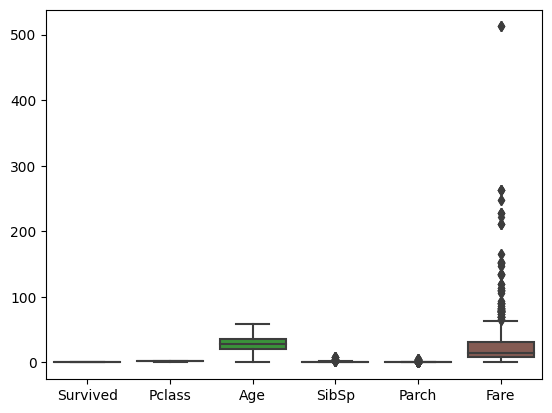

In [60]:
# Vamos a usar lo mismo con todos los valores numéricos
# Fare nos estorba, parece repleta de outliers. Vamos a tratarla primero
sns.boxplot(data=df)

<AxesSubplot:xlabel='Fare'>

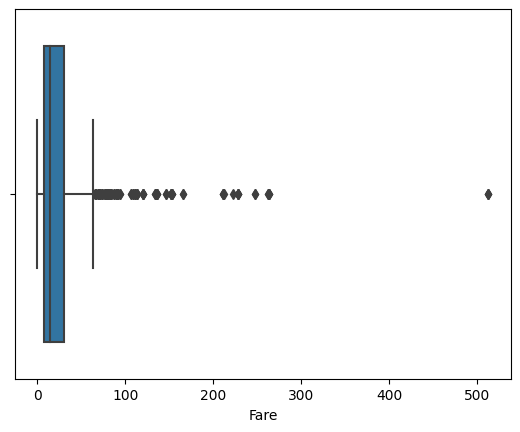

In [61]:
# Lo primero es el outlier que ya habíamos detectado en el EDA, los dos puntos donde alguien había pagado más de 500 libras
# Es un ejemplo de valor extremo
sns.boxplot(x=df["Fare"])

Nota para pensar: ¿Deberíamos considerar que haber pagado 0 es un outlier?

<AxesSubplot:xlabel='Fare'>

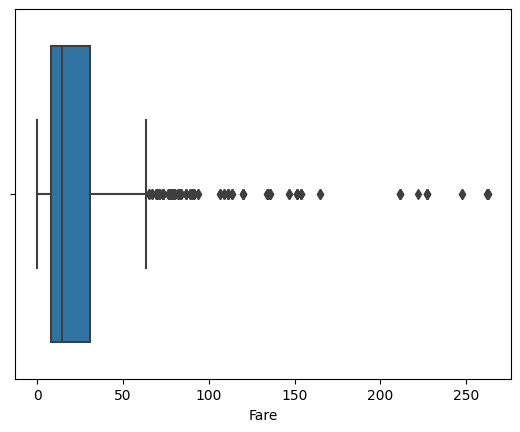

In [62]:
# Sigue habiendo mucho outlier. Así a ojo, demasiado como para tratarlo. Aquí parece outlier todo por encima de 60.
sns.boxplot(x=df[df["Fare"]<400]["Fare"])

<AxesSubplot:xlabel='Fare'>

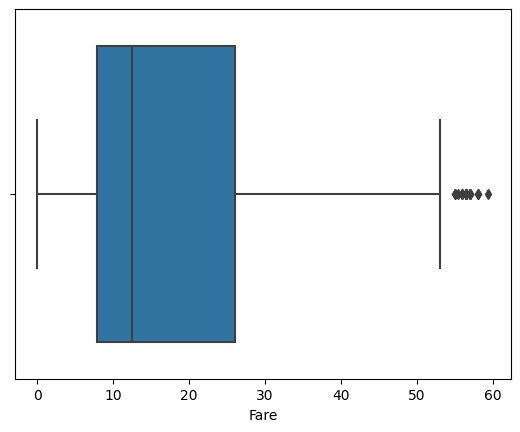

In [63]:
# Pero si afino el filtro, salen nuevos outliers. Además no puedo eliminar tantos datos. Si nos fijamos en la caja,
# hay un problema con la distribución de los datos. Volveremos a este paso después del paso en que veamos cómo tratar
# distribuciones no normales. De momento quedémonos con que por encima de 400 es un outlier, es bastante evidente y también
# se ve en la gráfica de distribución
sns.boxplot(x=df[df["Fare"]<60]["Fare"])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

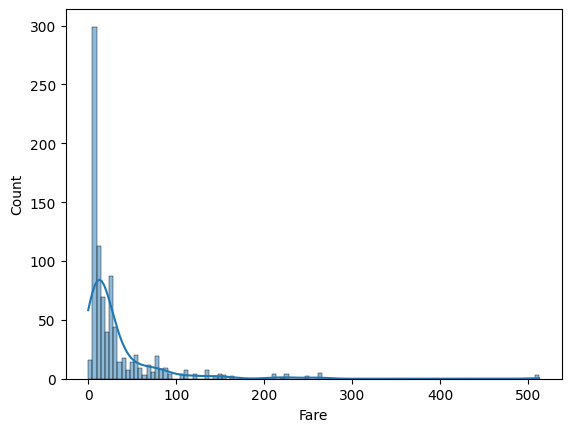

In [64]:
sns.histplot(data=df, x="Fare", kde=True)

In [65]:
# Eliminamos
df = df[df["Fare"]<400]

<AxesSubplot:xlabel='Fare', ylabel='Count'>

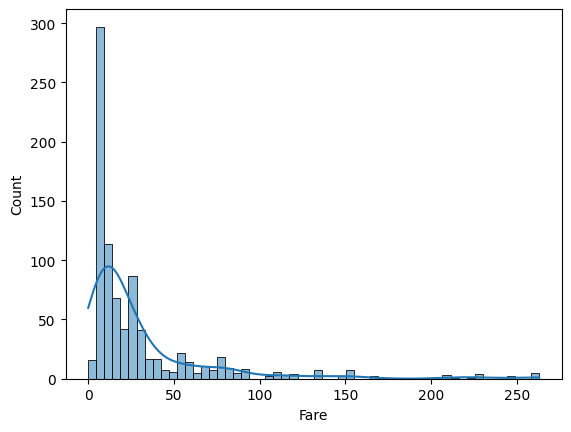

In [66]:
# Luego vemos qué hacer
sns.histplot(data=df, x="Fare", kde=True)

<AxesSubplot:>

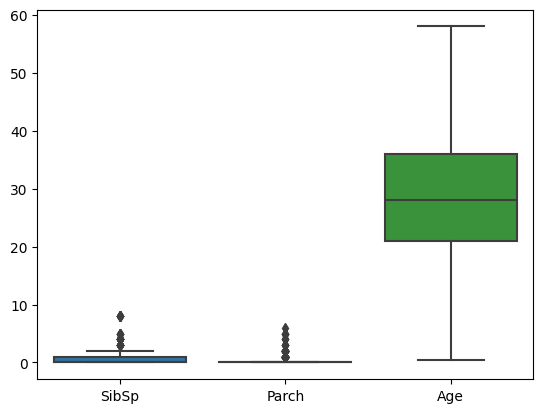

In [67]:
sns.boxplot(data=df[["SibSp", "Parch", "Age"]])

Respecto al número de familiares a bordo, al ser un rango muy muy pequeñito, no tendría en cuenta esos valores fuera de la caja. Otro caso sería si alguien hubiera traído 900 familiares, lo cual evidentemente sería un dato erróneo.

Otra manera posible de tratar los valores anómalos es, en vez de eliminarlos, cambiarlos por NaN, pero __solo en caso de que sea evidente que es un error de medida y nunca para casos extraordinarios__

<AxesSubplot:xlabel='SibSp', ylabel='Parch'>

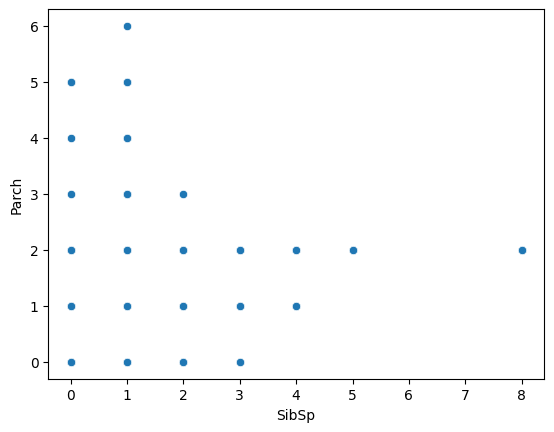

In [68]:
# Cuidado con el que lleva 8 familiares, podría ser outlier. Por lo demás, no parece haber tendencias
sns.scatterplot(data=df, x="SibSp", y="Parch")

In [69]:
# Son varios. Sospechoso que coincidan en casi todas las columnas
df[df["SibSp"]>6]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
160,0,3.0,male,38.333333,8.0,2.0,69.55,S
181,0,3.0,female,38.333333,8.0,2.0,69.55,S
202,0,3.0,male,38.333333,8.0,2.0,69.55,S
325,0,3.0,male,38.333333,8.0,2.0,69.55,S
793,0,3.0,female,38.333333,8.0,2.0,69.55,S
847,0,3.0,male,38.333333,8.0,2.0,69.55,S
864,0,3.0,female,38.333333,8.0,2.0,69.55,S


Este es uno de esos casos donde deberíamso volver al principio para asegurarnos. Se me hace raro que coincidan en casi todas las columnas. Pienso que la edad puede ser porque fueran NaN que hemos deducido (por eso habría que ver estos casos en el dataset original). Quizá sean todos hermanos (eso explicaría que todos tengan el mismo número de familiares, embarcasen en el mismo sitio y pagasen lo mismo), y eso podría comprobarlo mirando los apellidos de la columna que eliminé (de ahí la importancia de hacer este análisis en un notebook, donde no cuesta ir hacia delante y hacia detrás).

De momento lo dejaré aquí

#### ¿Y qué pasa con los datos categóricos?

Este es un dataset pequeño y es difícil tratar esos casos. Podría ser un problema que una clase estuviera sobrerrepresentada (es decir, que no estuviera balanceada), especialmente si es la clase objetivo. La única solución sería recortar los datos de los que tengo demasiados hasta equilibrar las clases, pero si eso supone eliminar demasiados registros no será viable (este dataset es muy pequeño, por ejemplo, y si elimino registros de embarcados en S para igualarlo con las demás clases, me quedaría con muy pocas muestras y perdería demasiados datos). Otra opción, si lo primero no es viable y la situación es muy molesta, es eliminar, como siempre, la variable que da problemas. Pero por lo general, podemos dejarlo como está, siempre que tengamso en cuenta que pueda ser un problema a futuro

In [70]:
df["Embarked"].value_counts()

S    625
C    160
Q     75
Name: Embarked, dtype: int64

In [71]:
df["Sex"].value_counts()

male      551
female    309
Name: Sex, dtype: int64

In [72]:
df["Pclass"].value_counts()

3.0    485
1.0    196
2.0    179
Name: Pclass, dtype: int64

Otra cosa que hubiera podido pasar es que al eliminar outliers nos hubieramos quedado con muy muy pocos registros de una categoría (por ejemplo, haber pasado de tener 350 female a tener solo 5, o cosas así). Eso sería un problema. Hay que estar siempre atento a qué transformaciones nos mejoran los datos y cuáles nos traen más problemas. Los datos dan de sí solo hasta cierto punto. Aquí vemos, si comparamos con la exploración inicial, que las proporciones más o menos se mantienen.

También vemos que aunque tenemos 625 personas que embarcaron en S y solo 75 en Q, no tiene sentido eliminar 550 datos de S y 90 de C solo para igualarlas, porque perderíamos la mayoría de datos.

### Distribuciones

Hasta ahora hemos hablado varias veces de la distribución normal. Es la distribución de datos numéricos que cumple la propiedad de que su media y su mediana son similares y los valores en sus extremos tienden a 0. Representada en forma de gráfico tiene forma de campana, como sigue:

<AxesSubplot:ylabel='Count'>

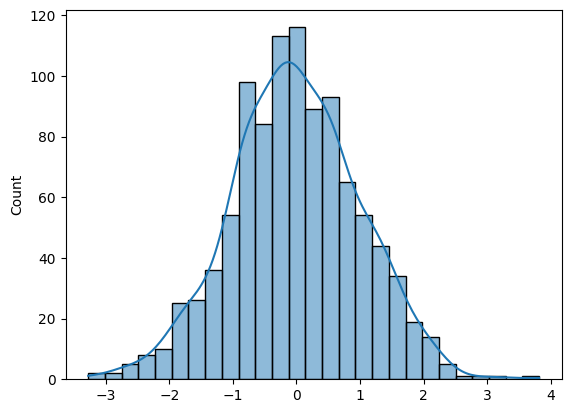

In [73]:
mu, sigma = 0, 1 # mean and standard deviation
normal_data = np.random.normal(mu, sigma, 1000)
sns.histplot(x=normal_data, kde=True)

In [74]:
media = np.mean(normal_data)
mediana = np.median(normal_data)
print(f"La media de la distribución es: {round(media, 2)}")
print(f"La mediana de la distribución es: {round(mediana, 2)}")

La media de la distribución es: -0.02
La mediana de la distribución es: -0.04


Otras distribuciones pueden ser por ejemplo la exponencial

<AxesSubplot:ylabel='Count'>

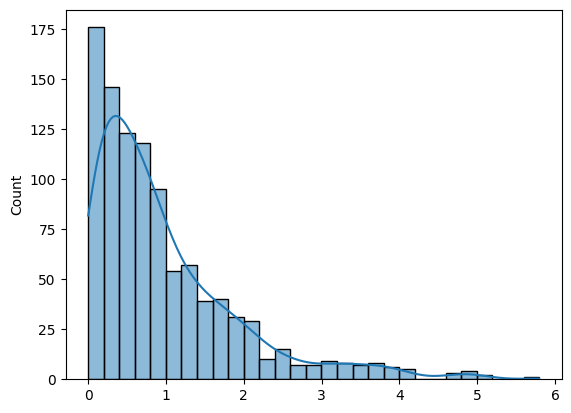

In [75]:
exponential_data = np.random.exponential(scale=1.0, size=1000)
sns.histplot(x=exponential_data, kde=True)
#exponential_data

Desgranar todo lo que esto significa es extenso y complejo, así que lo simplificaré y explicaré por qué es importante. 

Primero de todo, esta distribución nos permite describir una inmensa cantidad de fenómenos naturales. Pensado con sentido común, tiene sentido darse cuenta de que lo habitual es que un valor para una variable sea el "normal" y más común y cuánto más extremo alejado de ese valor, menos habitual es el fenómeno. Por ejemplo, al medir las estaturas de una población en un rango de edad, esa población va a tender a cierta medida en altura. Habrá gente más alta y gente más baja, pero cuanto más extrema sea la diferencia, menos común será el caso. Así, si la media de altura en españa es 1'7m, lo más probable para una persona cuya altura no conocemos es que mida 1'7. Que mida 2'0m es tan poco probable como que mida 1'4m (aunque, en su rango de probabilidad, ambas son posibles). Tanto que mida 0'9m como que mida 2'5m es extremadamente improbable por igual.

Esto quiere decir que, para muestras representativas escogidas al azar, es altamente probable que escondan una distribución normal en sus valores numéricos. Si deberían cumplirlo y no lo cumplen, es que nuestra muestra no es representativa. Aquí el caso difícil: a veces sí que la muestran pero está oculta y es posible transformar los datos para sacarla a relucir. A la hora de comparar datos entre sí, es __muy importante__ que todas las variables sean lo más parecidas entre sí que sea posible. Esto quiere decir que si una variable es normal, y la otra lo es de manera "oculta", transformarla para que lo sea de manera explícita va a ser increíblemente beneficioso, y me puede sacar a la luz relaciones que antes quedaban ocultas.

A nivel machine learning, algunos modelos __esperan__ que los datos numéricos de entrada estén normalmente distribuídos. De no estarlo, por ejemplo de tener una distribución exponencial (como la de arriba, lo cual es común), el modelo tenderá a dar mucha más importancia a esa característica, sesgando el modelo y teniendo un impacto muy negativo en el resultado. Pero es que incluso los modelos que no esperan necesariamente variables distribuídas de forma normal se ven beneficiadas de que lo estén, resultando en tiempos de entrenamiento más rápidos y más velocidad de procesamiento (lo cual, sobre todo en modelos pesados, es importantísimo)

Enlaces para ampliar informacion:
- https://towardsdatascience.com/the-normal-distribution-17a4092766ac
- https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal#Definici%C3%B3n_formal


Podemos echar un primer vistazo con la función de pandas .skew(). Nos dice cuál es la simetría de los datos. Una variable perfectamente normal tendría un skew de 0, es decir, que no tendría más peso hacia un lado o hacia otro

In [76]:
# La edad cojea un poco hacia la izquierda (por el peso de la cantidad de niños de 0 años que hay), 
# pero está bastante cercana a 0. La que no lo está es el Fare

df[["Age", "Fare"]].skew()

Age    -0.007978
Fare    3.176104
dtype: float64

A parte del histograma y el boxplot que ya hemos visto (una distribución normal en un boxplot se ve como una caja simétrica), un gráfico interesante para comprobar la distribución es el gráfico Q-Q. Más información:

- https://es.wikipedia.org/wiki/Gr%C3%A1fico_Q-Q

Vamos a explorar nuestras dos varaibles numéricas continuas con estos gráficos. Primero la edad (que ya hemos visto que cumple la distribución normal sin mayores transformaciones)

<AxesSubplot:xlabel='Age', ylabel='Count'>

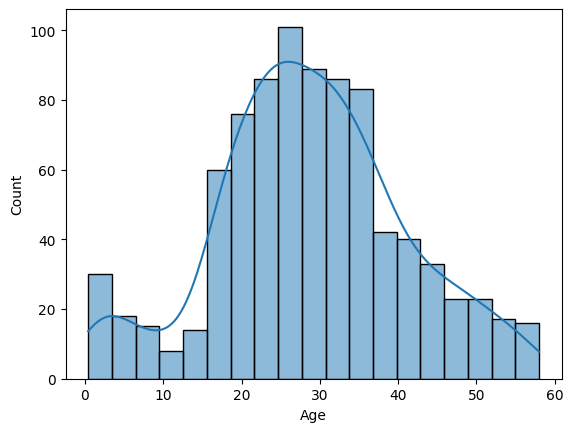

In [77]:
sns.histplot(x=df["Age"], kde=True)

<AxesSubplot:xlabel='Age'>

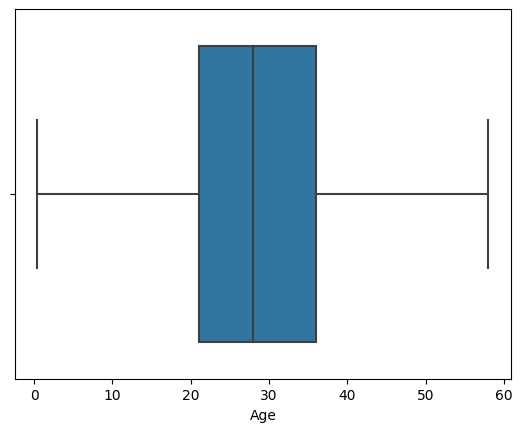

In [78]:
sns.boxplot(x=df["Age"])

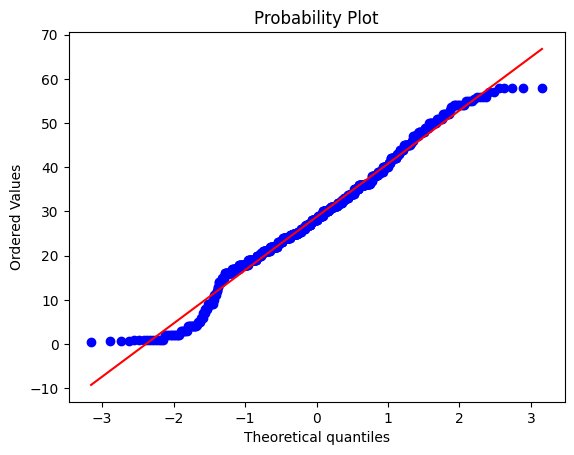

In [79]:
# Cuanto más se ajusten los puntos a la línea, más normal es la distribución
import pylab 
import scipy.stats as stats

stats.probplot(df["Age"], dist="norm", plot=pylab)
pylab.show()

No es perfecto pero nos sirve. Vamos a ver la otra variable

<AxesSubplot:xlabel='Fare', ylabel='Count'>

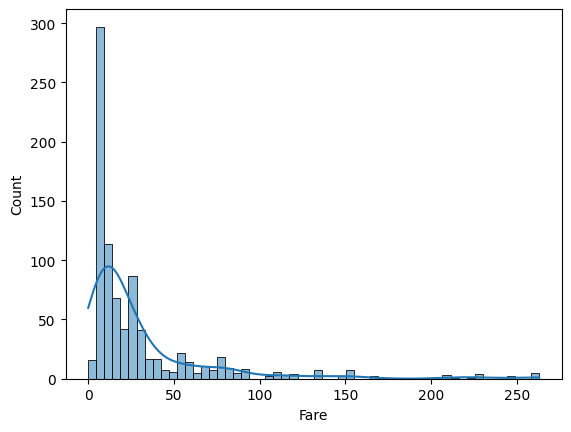

In [80]:
# Pinta a exponencial
sns.histplot(x=df["Fare"], kde=True)

<AxesSubplot:xlabel='Fare'>

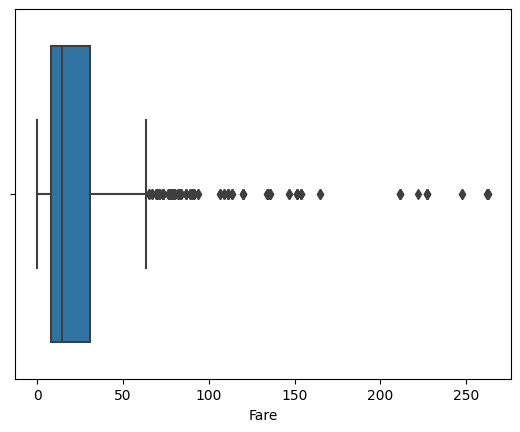

In [81]:
# No pueden ser tantos outliers, más a favor de la exponencial
sns.boxplot(x=df["Fare"])

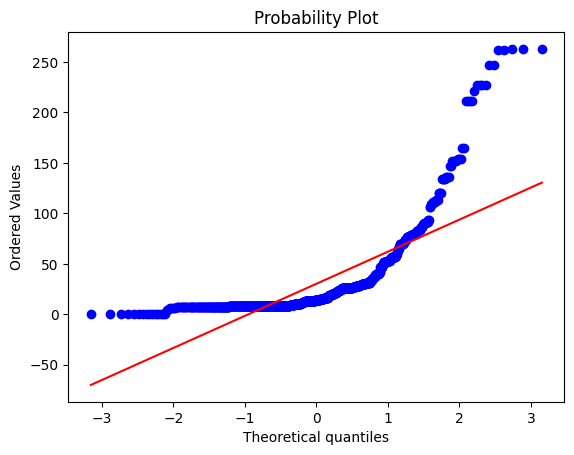

In [82]:
# Ni un atisbo de ajuste. Necesita transformación
stats.probplot(df["Fare"], dist="norm", plot=pylab)
pylab.show()

Muchas veces, como decía antes, las distribuciones no normales esconden distribuciones normales y pueden ser transformadas para ajustarse. Aquí os dejo un artículo sobre transformaciones de distribuciones:
- https://www.analyticsvidhya.com/blog/2021/05/how-to-transform-features-into-normal-gaussian-distribution/

Vamos a probar

In [83]:
# Primero, con el logaritmo: pista, buscar la diferencia entre np.log() y np.log1p(), a veces conviene más uno que otro
log_fare = np.log1p(df["Fare"])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

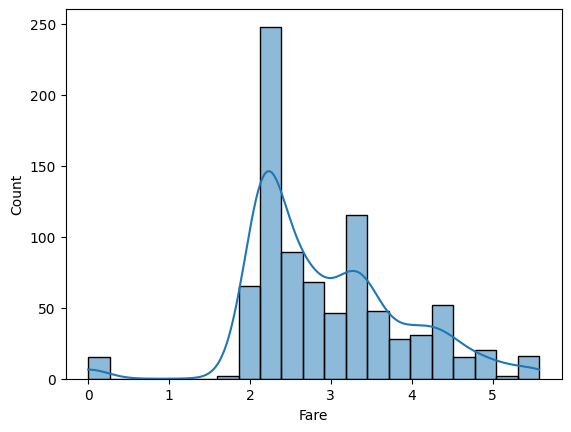

In [84]:
# No me sirve, sigue sin ser normal, ni parecido
sns.histplot(x=log_fare, kde=True)

<AxesSubplot:xlabel='Fare'>

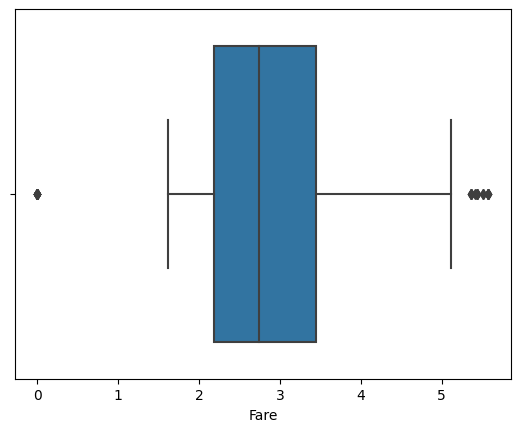

In [85]:
# Aunque aquí se ve mejor
sns.boxplot(x=log_fare)

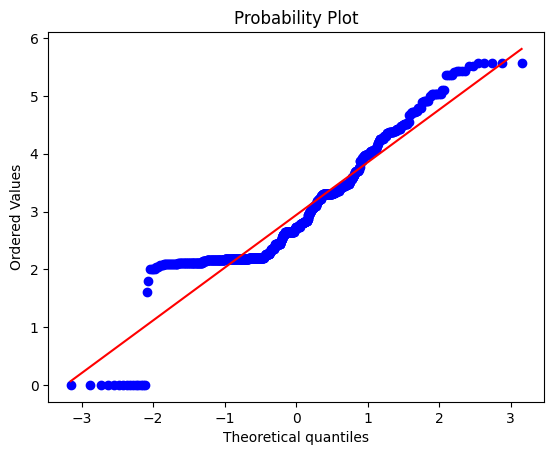

In [86]:
# Es un poco mejor, pero aún no es lo que buscamos
stats.probplot(log_fare, plot=pylab)
pylab.show()

In [87]:
# Vamos a ver la transformación recíproca
reciprocal_fare = 1/df["Fare"]

<AxesSubplot:xlabel='Fare', ylabel='Count'>

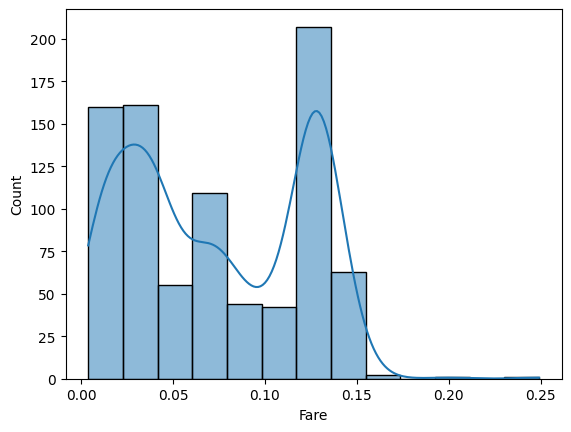

In [88]:
# Evidentemente, esta tampoco nos ayuda
sns.histplot(x=reciprocal_fare, kde=True)

C:\Users\dleir.DESKTOP-BQLT9IG\miniconda3\lib\site-packages\numpy\lib\function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


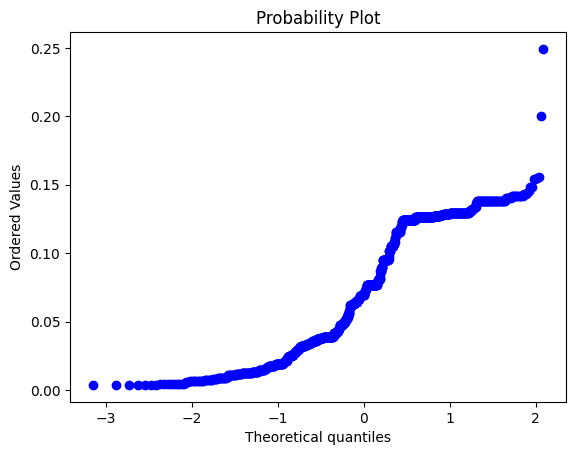

In [89]:
stats.probplot(reciprocal_fare, plot=pylab)
pylab.show()

In [90]:
# Transformación de raíz cuadrada
sqrt_fare = np.sqrt(df["Fare"])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

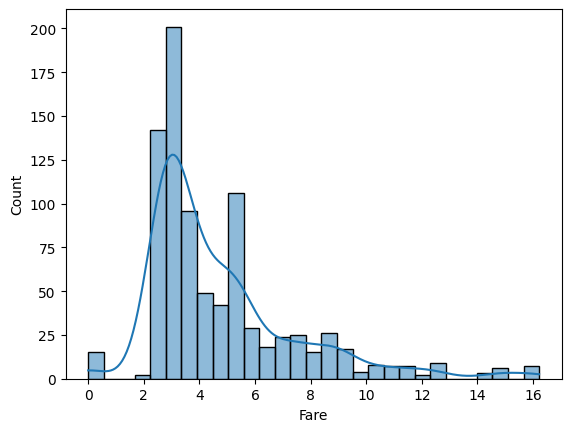

In [91]:
# Bastante mejor, pero aún lejos de ser normal
sns.histplot(x=sqrt_fare, kde=True)

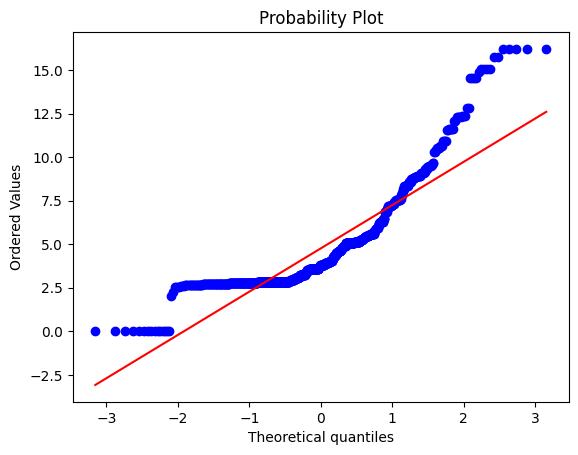

In [92]:
# Aquí se ve que sigue sin casar bien
stats.probplot(sqrt_fare, dist="norm", plot=pylab)
pylab.show()

In [93]:
# Probamos con la transformación exponencial del artículo (aunque tengo 0% de fe)
exp_fare = df["Fare"]**(1/1.2)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

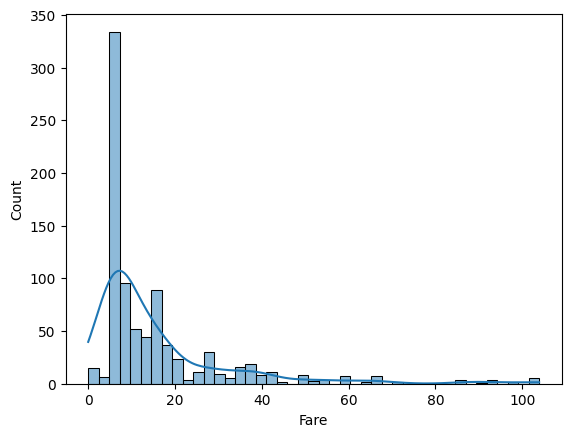

In [94]:
# Efectivamente, no nos sirve. Ni me molesto en las otras dos gráficas
sns.histplot(x=exp_fare, kde=True)

In [95]:
# Boxcox fallaría porque tengo valores 0, tengo que usar boxcox1p
from scipy.special import boxcox1p

# Despues de explorar los valores para lambda, este es el que mejor funciona, pero es equivalente a aplicar el logaritmo,
# como habíamos hecho antes

boxcox_fare=boxcox1p(df['Fare'], 0)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

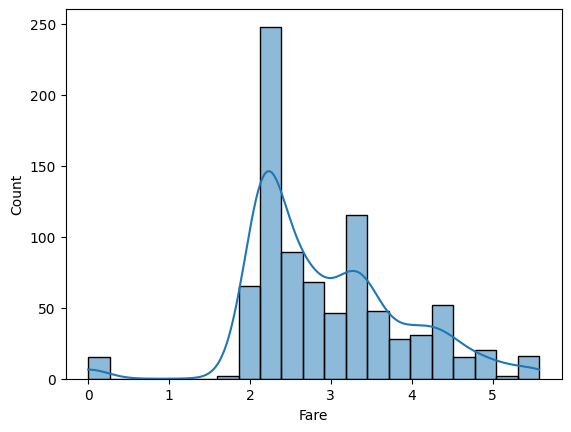

In [96]:
sns.histplot(x=boxcox_fare, kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

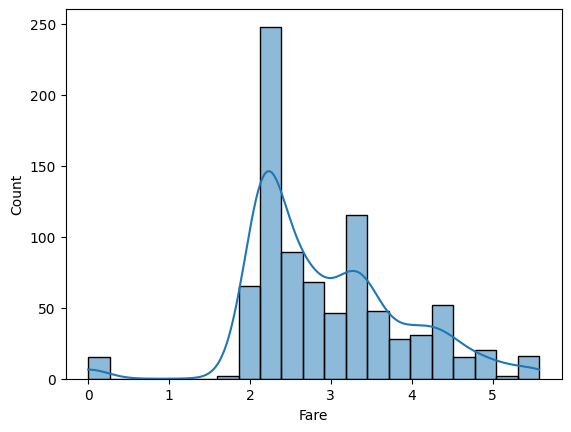

In [97]:
sns.histplot(x=log_fare, kde=True)

Ya que ninguna me sirve, parece que esta distribución no esconde ninguna distribución normal. Pero hemos dicho que los modelos esperan que lo sea. Aquí el truco es que si la variable al ser numérica requiere de ser normal, y por su anturaleza no lo es, entonces lo que sí que puedo hacer es transformarla para que sea categórica.

Esto se hace agrupando los valores bajo algún criterio. por ejemplo, viendo que lo normal en el titanic era pagar alrededor de 15/20 libras, puedo afirmar que cualquiera que pagara menos era de tipo "Privilegiado_por_pagar_poco", dándome igual si pagó 0, 1 o 2 libras. Por el contrario si pagó alrededor de 50, podría decir que fue "estafado_por_pagar_de_más". Cualquiera que pagara más de 80 libras probablemente era rico y sabía lo que estaba haciendo, y me da igual si lo que pagó fue 90, 200 o 300 libras, puedo categorizarlo como "ricos_pagando_por_privilegios". De este modo habría convertido mi variable numérica en una varaible categórica con 4 categorías: "Privilegiado_por_pagar_poco", "precio_estándar", "estafado_por_pagar_de_más" y "ricos_pagando_por_privilegios" (sería mejor afinar los nombres, pero se entiende).

Si no da buenos resultados, podría vovlerse y afinar, lo suyo es intentar que la categorización sea bajo algún criterio y que esté lo más equilibrada posible. Pandas nos ofrece la función .cut() para estos casos.

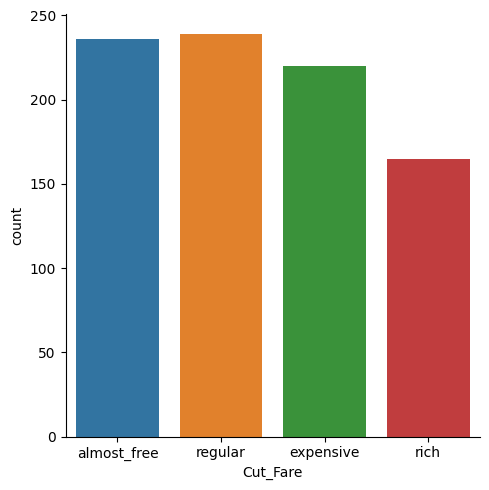

In [98]:
# Probando a ojo, creo que esos son los valores
labels = ["almost_free", "regular", "expensive", "rich"]
bins = [-100,8,16,40,1000]
df["Cut_Fare"] = pd.cut(df["Fare"], bins=bins, labels=labels)

sns.catplot(data=df, x="Cut_Fare", kind="count")

Tenemos una nueva variable, tenemos que explorarla. Si está bien, debemos eliminar la variable Fare. Recordemos que tanto Fare como Cut_Fare son la misma, solo que transformada en categórica. Considerad también que he intentado que estén balanceadas como primera aproximación, pero lo ideal sería dedicarle tiempo a encontrar un ajuste óptimo

In [99]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Cut_Fare    0
dtype: int64

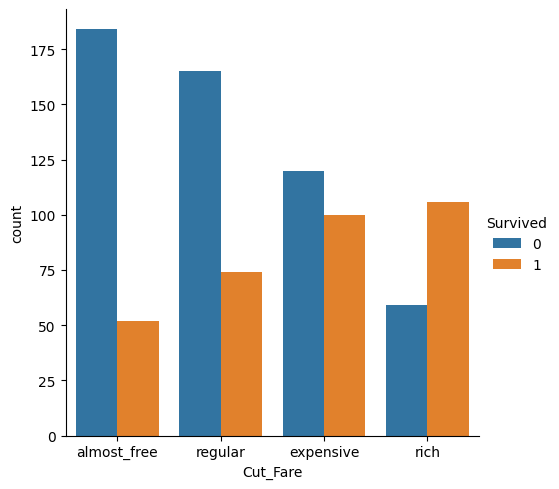

In [100]:
sns.catplot(data=df, x="Cut_Fare", kind="count", hue="Survived")

Vemos una tendencia CLARÍSIMA a que a más pagas por el billete, más probabilidad de supervivencia. Ya teníamos algo así, a mayor clase social, más probabilidad de supervivencia. ¿Será el mismo patrón, porque es razonable pensar que a más pagar, más clase? Vamos a verlo

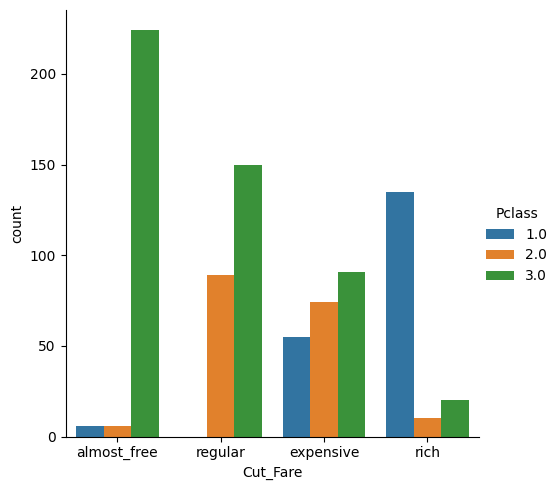

In [101]:
sns.catplot(data=df, x="Cut_Fare", kind="count", hue="Pclass")

Parece que si, pero no del todo. Hubo gente de primera y segunda que casi no pagó. Y gente de segunda que pagó poco. Y gente de tercera y segunda que pagaron como ricos. O son outliers (no tiene pinta) o hemos encontrado un poquito de información nueva :)

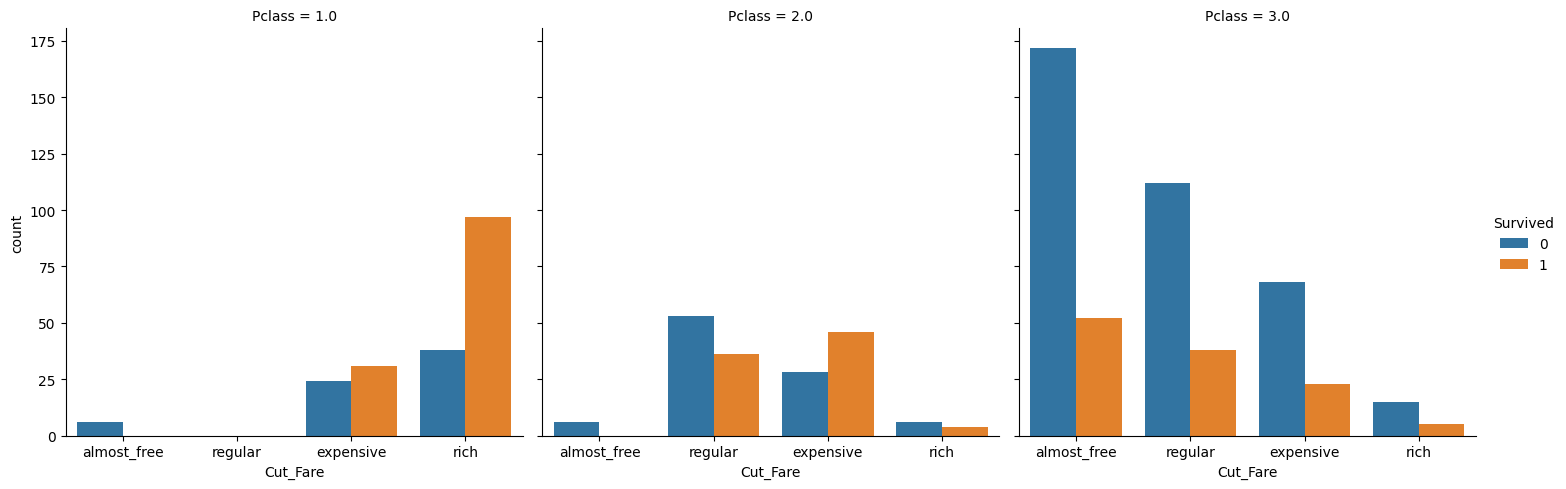

In [102]:
sns.catplot(data=df, x="Cut_Fare", kind="count", hue="Survived", col="Pclass")

Los de tercera si que tienen la misma tendencia a morir pagasen lo que pagasen (para ellos prima la clase), pero en primera, los que pagaron poco murieron, mientras que a más pagaron, más sobrevivieron. En segunda sobrevivieron más los que pagaron caro pero sin pasarse.

In [103]:
# Como estos datos son buenos, voy a eliminar la otra columna :)
df.drop("Fare", axis=1, inplace=True)
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Cut_Fare
PassengerId,,,,,,,,
102,0,3.0,male,31.333333,0.0,0.0,S,almost_free
608,1,1.0,male,27.000000,0.0,0.0,S,expensive
740,0,3.0,male,31.333333,0.0,0.0,S,almost_free
876,1,3.0,female,15.000000,0.0,0.0,C,almost_free
753,0,3.0,male,33.000000,0.0,0.0,S,regular
447,1,2.0,female,13.000000,0.0,1.0,S,expensive
735,0,2.0,male,23.000000,0.0,0.0,S,regular
545,0,1.0,male,50.000000,1.0,0.0,C,rich
669,0,3.0,male,43.000000,0.0,0.0,S,regular


### Otras transformaciones

Como ya he dicho, las transformaciones que se pueden llegar a hacer son muchísimas y dependen del tiempo que tengáis, la creatividad, la calidad y extensión de los datos, etc.

Por ejemplo, en este dataset podríamos llegar a sacar la cubierta y la habitación a partir del parámetro "Cabin", el estatus social a partir de los apellidos (cruzando con alguna base de datos de apellidos nobles) y cosas así (a esto se le llama extracción de características). En algunos datasets será interesante combinar los datos de dos columnas en una sola. A veces podemos cambiar la expresión de una variable (por ejemplo, de una variable que fuera la fecha de la última vez que se llamó a un cliente, podríamos convertirla en días que han pasado desde la última vez que se le contactó) y mil cosas. En última instancia, el criterio que tenemos para saber si lo hacemos bien o mal será la calidad del modelo que obtengamos como resultado.

Por esto último, lo aconsejable es hacer un EDA y unas transformaciones rápidas y evidentes para poder entrenar un modelo cuanto antes y __después__ volver atrás a afinar este proceso para mejorar aquel, ya que tendríamos una medida objetiva de si lo estamos haciendo bien o mal.

Recapitulamos transformaciones necesarias:

- Eliminación de duplicados
- Selección/extracción de características
- Imputación de valores perdidos
- Detección de outliers
- Balanceo de clases
- Tratamiento de distribuciones

Recordad que no son categorías monolíticas y que en la práctica se entremezcla todo. Recordad que dataset específicos requieren tratamientos específicos.

# Preprocesado de datos

Ahora que tenemos el dataset "limpio", no hemos terminado. A parte de la limpieza y transformaciones que los datos necesitan para ser representativos y lo más informativos posibles con el menor ruido posible, los propios modelos de machine learning tienen sus exigencias particulares.

Por ejemplo, ya hemos hablado de que algunos modelos (como el caso de KNN, SVM, K-means, etc) requieren de que las variables cumplan ciertas condiciones. Es aún más evidente si nos damos cuenta de que algunas de nuestras variables son categóricas y vienen representadas con strings con los que naturalmente no podemos operar. but __DON'T PANIC__, hay una solución para todo. 

De primeras, dado que esto es un problema de __aprendizaje supervisado__ y en concreto de __clasificación__ porque nuestra variable _y_ ("Survived") es categórica, a la hora de entrenar el modelo, deberemos indicarle __por separado__ qué variable es la que debe predecir (cuál es la _y_) y qué datos son los que debe usar (nuestra matriz _X_)

In [104]:
y = df["Survived"]
X = df.drop("Survived", axis=1)

In [105]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [106]:
# Aquí nuestro vector target
y.to_numpy()

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [107]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Cut_Fare
PassengerId,,,,,,,
1,3.0,male,22.0,1.0,0.0,S,almost_free
2,1.0,female,38.0,1.0,0.0,C,rich
3,3.0,female,26.0,0.0,0.0,S,almost_free
4,1.0,female,35.0,1.0,0.0,S,rich
5,3.0,male,35.0,0.0,0.0,S,regular


In [108]:
# Aquí nuestra matriz X
X.to_numpy()

array([[3.0, 'male', 22.0, ..., 0.0, 'S', 'almost_free'],
       [1.0, 'female', 38.0, ..., 0.0, 'C', 'rich'],
       [3.0, 'female', 26.0, ..., 0.0, 'S', 'almost_free'],
       ...,
       [3.0, 'female', 25.333333333333332, ..., 2.0, 'S', 'expensive'],
       [1.0, 'male', 26.0, ..., 0.0, 'C', 'expensive'],
       [3.0, 'male', 32.0, ..., 0.0, 'Q', 'almost_free']], dtype=object)

Para estar en igualdad de condiciones, vamos a convertir la única variable categórica que tenemos representada en formato número a formato string:

In [109]:
old_values = [1.,2.,3.]
new_values = ["primera", "segunda", "tercera"]
X["Pclass"] = X["Pclass"].replace(old_values, new_values)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Cut_Fare
PassengerId,,,,,,,,
1,0,3.0,male,22.0,1.0,0.0,S,almost_free
2,1,1.0,female,38.0,1.0,0.0,C,rich
3,1,3.0,female,26.0,0.0,0.0,S,almost_free
4,1,1.0,female,35.0,1.0,0.0,S,rich
5,0,3.0,male,35.0,0.0,0.0,S,regular


### Transformar variables categóricas

Dos métodos para convertir a números columnas que no lo son:

- Label encoding
- One Hot Encoding

Vamos a ver ambas opciones

#### Label encoding

Este método consiste, sencillamente, en asignar a cada etiqueta un número que lo identifica.

Si tenemos tres colores (rojo, amarillo, verde), es tan simple como convertirlos a (0,1,2). Los registros "rojo" pasarán a ser 0, los registros "amarillo" pasarán a ser 1 y los registros "verde" pasarán a ser 2.

Con nuestras etiquetas convertidas a números ya podemos empezar a operar con ellas. Así de sencillo, podemos hacerlo por ejemplo a mano con la función .replace() de pandas (es lo inverso de lo que he hecho arriba).

¿Y entonces por qué no lo he dejado ya como estaba? pues porque este método tiene algunos inconvenientes fuertes.

El primero es que al asignar números a las etiquetas, les estamos asignando propiedades que realmente no tienen. Por ejemplo, en el caso de los colores, rojo no es más que verde, pero 2 si que es más que 0. Amarillo no va antes que verde, eso ni siquiera tiene sentido, pero 1 si que va antes que 2. Es más, verde no es el doble que amarillo, pero 2 si que es el doble que 1. Esto es un problema, porque le estoy dando información al modelo que no es correcta.

Otro problema es que si tengo muchas etiquetas (pongamos que hay 60 colores posibles), hay muchísima diferencia entre el color con la etiqueta 0 y el color con la etiqueta 59. El color con la etiqueta 59 va a tender a tener mucho peso en los calculos sencillamente porque es un número mucho más alto (imaginad que no es igual multiplicar por 1 que por 59).

¿Significa esto que no se utiliza? No, tiene su ámbito de aplicación:

- Es la manera de codificar la variable de salida sin complicar el problema, al fin y al cabo, no vamos a operar con la variable objetivo, sino que pretendemos que sea el resultado de la operación
- Cuando tenemos una variable binaria, las propiedades que tiene el 1 y el 0 son suficientes (es como decir sí o no, verdadero o falso). Cualquier varaible binaria se puede expresar en formato booleano. Por ejemplo: en este dataset tenemos una variable binaria que es "Sex", solo puede tomar dos valores (male y female). También podemos plantear esa variable como si representara "male", de forma que 1 o True significaría que es male, y 0 o False significaría que es female. Es irrelevante a qué variable asignamos 0 o 1, la otra toma el valor restante por descarte

Como en este dataset tenemos una variable binaria, vamos a aplicar este método. Hay dos maneras de hacerlo, os enseño ambas:

In [110]:
# Con pandas
X["Sex"] = X["Sex"].replace({"male":1,"female":0})
X["Sex"]

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 860, dtype: int64

In [111]:
# Lo deshacemos para ver el otro método
X["Sex"] = X["Sex"].replace({1:"male", 0:"female"})
X["Sex"]

PassengerId
1        male
2      female
3      female
4      female
5        male
        ...  
887      male
888    female
889    female
890      male
891      male
Name: Sex, Length: 860, dtype: object

In [112]:
# Con sklearn
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X["Sex"] = encoder.fit_transform(X["Sex"])
X["Sex"]

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 860, dtype: int32

Lo bueno de este método es que si lo usáis para varias variables luego podéis persistirlo para usarlo en producción

#### One-Hot Encoding

Este es el método más avanzado. Grabadlo a fuego porque aparecerá más veces en el futuro, en otros contextos.

La idea es sencilla. Cojemos cada una de las etiquetas posibles para una variable. En el caso de Embarked en nuestro dataset, S, C y Q. Generamos una columna nueva para cada valor posible (Embarked_Q, Embarked_S, Embarked_C). Cada columna va a estar llena de 0 y 1, siendo 1 solamente para las instancias que tengan esa etiqueta y 0 en las otras columnas.

Por ejemplo, si el tercer pasajero embarcó en Southampton, tendrá un 0 en la columna Embarked_C, un 0 en la columna Embarked_Q y un 1 en la columna Embarked_S. Lo vemos aquí:

In [113]:
X[["Embarked"]]

,Embarked
PassengerId,
1,S
2,C
3,S
4,S
5,S
...,...
887,S
888,S
889,S


In [114]:
pd.get_dummies(X["Embarked"])

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


Usamos la función de pandas get_dummies() (recordad siempre porfa leer la documentación de estas cosas)

También tenemos un método con sklearn:

In [115]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
a = encoder.fit_transform(X["Embarked"].to_numpy().reshape((-1,1)))

In [116]:
# Tocaría añadirlo al df, yo en este caso prefiero el método de pandas
a.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

La ventaja es que por cientos de etiquetas posibles para la variable, nunca vamos a introducir propiedades nuevas, lo cual no es poco. Lo malo es que antes teníamos una columna y ahora tenemos 3. Pero no es nuestra única varaible categórica. Tenemos que tratar Pclass (con 3 etiquetas) y Cut_Fare (con 4). Pasaríamos de tener 3 columnas a tener 3+3+4=10. Más del triple. Y eso que son pocas. Si tuvieramos una columna con países y hubiera 60 países, tendríamos por esa columna, 60 columnas nuevas.

Añadir variables complica los cálculos y hace el modelo más lento. Si ganamos información no es problema, pero es que encima casi todos los valores nuevos son 0 (pensad el caso de los 60 países, por cada línea nueva tengo 59 ceros y un solo uno). Esto es lo que se conoce como una matriz dispersa (sparse matrix, por contraposición a matriz densa, dense matrix). Encima de que nuestro modelo tiene que tener en cuenta 59 variables más que antes, la mayoría no contiene información. En muchos casos, el aumento de variables puede llegar a hacer que el ordenador no tenga memoria suficiente para hacer los cálculos o siquiera para guardar el dataframe en memoria. Por si fuera poco, ganando muchas dimensiones en la matriz podemos llegar a invocar lo que se conoce como __curse of dimensionality__ (maldición de dimensionalidad), algo que veremos cuando veamos aprendizaje no supervisado.

De nuevo __DON'T PANIC!__. Aún no nos vamos a encontrar con casos así. Y en el futuro tendremos herramientas para identificar y para tratar el problema. Lo importante es que de momento es el mejor método que tenemos.

In [117]:
X = pd.get_dummies(X)

In [118]:
# Vemos como las variables dummy ahora ocupan casi todo el dataset
X.head()

,Sex,Age,SibSp,Parch,Pclass_primera,Pclass_segunda,Pclass_tercera,Embarked_C,Embarked_Q,Embarked_S,Cut_Fare_almost_free,Cut_Fare_regular,Cut_Fare_expensive,Cut_Fare_rich
PassengerId,,,,,,,,,,,,,,
1,1,22.0,1.0,0.0,0,0,1,0,0,1,1,0,0,0
2,0,38.0,1.0,0.0,1,0,0,1,0,0,0,0,0,1
3,0,26.0,0.0,0.0,0,0,1,0,0,1,1,0,0,0
4,0,35.0,1.0,0.0,1,0,0,0,0,1,0,0,0,1
5,1,35.0,0.0,0.0,0,0,1,0,0,1,0,1,0,0


Otra ventaja de hacerlo así, es que después analizando el modelo, podemos ver qué características está teniendo en cuenta y cuales no, y así descartar información que realmente es ruido. Por ejemplo, podríamos ver si el modelo le da muchísima importancia a si la persona es rica (hay un 1 en Cut_Fare_rich) y practicamente ninguna a si fueron gratis o pagaron normal. De modo que podríamos quedarnos solo con "Cut_Fare_rich" frente al resto de cuts fares que tenemos. No suele ser tan fácil, pero a veces ocurren estas cosas.

### Normalización

Por lo general, nuestro modelo va a extraer patrones a base de comparar variables.

Como os podéis imaginar, es muy difícil comparar variables que son muy diferentes. Con todas las transformaciones que hemos hecho, las variables ya son más fáciles de comparar (imagináos al principio si tenemos que comparar 22 de la columna age con 3 de la columna PClass y male de la columna Sex, es que no tiene ni sentido).

Pero no hemos terminado. Hay un problema que en este dataset no es muy evidente pero en otros sería un problema gordísimo. Las variables no concuerdan en escala (no es habitual que lo hagan). Nuestra variable "Age", va de 0 a 60, mientras que Parch va de 0 a 8 o 9 y Sex va de 0 a 1.

Si el dataset contuviera la cuenta del banco de los pasajeros, podría haber quien tuviera un millón de libras porque es rico (1000000) y quien debiera 500 libras (-500), siendo una escala aún más evidentemente desproporionada respecto de los demás datos.

Esto va a dar problemas de sesgos en algunos modelos (sobre todo los que computan distancias o comparan variables), pero incluso en los que no lo da (como en árboles de decisión o redes neuronales), tener todas las variables en la misma escala va a mejorar la velocidad de cómputo y a reducir la velocidad de entrenamiento, lo cual siempre es positivo.

Vamos a ver dos posibilidades de escalado: Normalización y estandarización

Artículo: https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#:~:text=An%20alternative%20approach%20to%20Z,range%20%2D%20usually%200%20to%201.

#### Estadarización

Esta técnica es para datos numéricos. Concretamente datos numéricos distribuídos de manera normal (ya os he dado la turra con este concepto).

Un método común es la normalización Z-score. Consiste en restar a una columna su media y dividirla entre la desviación estandar.

El resultado es una distribución centrada en 0 y con desviación de 1. Vamos a verlo:

<AxesSubplot:xlabel='Age', ylabel='Count'>

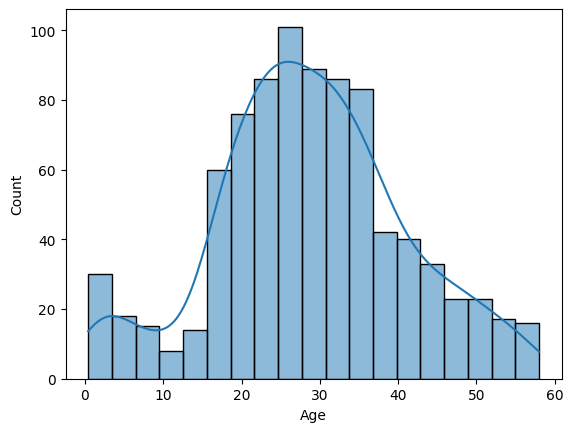

In [119]:
# Fijáos en el eje X
sns.histplot(x = X["Age"], kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

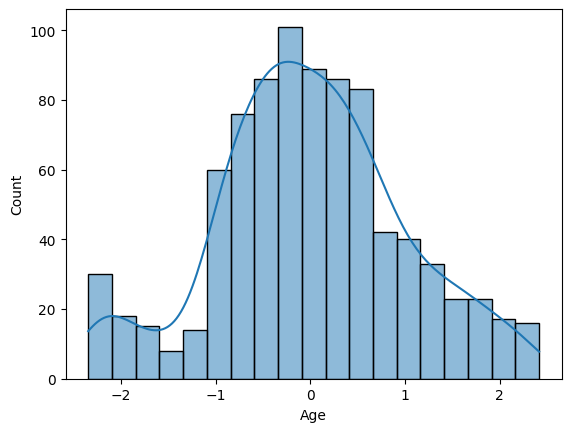

In [120]:
# Mantenemos las proporciones, pero la media está centrada en 0 y la desviación en 1
norm = ((X["Age"]) - X["Age"].mean()) / X["Age"].std()
sns.histplot(x = norm, kde=True)

In [121]:
# Así se hace con sklearn
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
norm = stdscaler.fit_transform(X["Age"].to_numpy().reshape((-1,1)))

<AxesSubplot:ylabel='Count'>

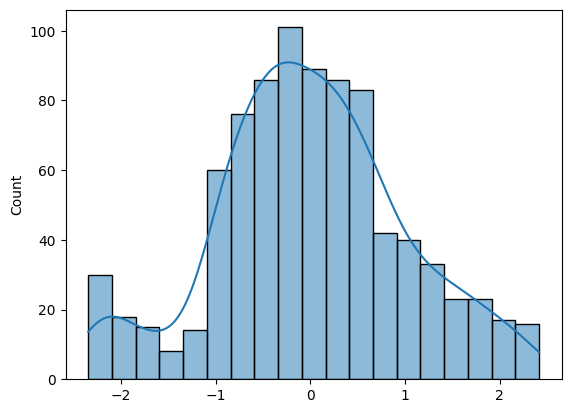

In [122]:
# Como veis, mismo resultado
sns.histplot(x = norm.flatten(), kde=True)

Como la gran mayoría de columnas no son numéricas y/o no siguen la distribución normal, vamos a usar en este caso el otro método.

#### Escalado

Como lo que importan son las proporciones, vamos a llevar las variables a la misma escala.

Si todas nuestras varaibles fuesen medidas, bastaría con convertirlas todas a la misma unidad, por ejemplo, todo a cm.

En el mundo real, las variables van a ser siempre diversas, por lo que es aconsejable utilizar algo más generalizable. Por ejemplo, y ya que tenemos muchos datos en esa escala, balancearlos en una escala de 0 a 1. Si por ejemplo, estuviera tratando con precios de viviendas, donde el más barato vale 60.000€ y el más caro 800.000, alt ransformarlos, el mas barato pasaría a valer 0 y el más caro 1. El que costase 340.000, en la mitad entre ambos, pasaría a valer 0.5. Es una manera de comprimir los datos en la misma escala. Al no perder la proporción, la información que contenían se mantiene, la escala es completamente irrelevante, pero al compartir escala con el resto de variables, se vuelve comparable y se pone al mismo nivel, lo que sí es muy importante.

A este método se le llama min-max scaler. Consiste en, a cada valor, restarle el mínimo de la columna y dividirlo entre el mínimo menos el máximo.

Este es el que vamos a usar para nuestras variables numéricas, con su implementación en sklearn:

In [123]:
from sklearn.preprocessing import MinMaxScaler

vars_to_scal = ["Age", "SibSp", "Parch"]
scaler = MinMaxScaler()
X[vars_to_scal] = scaler.fit_transform(X[vars_to_scal])

In [124]:
# Aquí lo vemos
X[vars_to_scal].head()

,Age,SibSp,Parch
PassengerId,,,
1,0.374783,0.125,0.0
2,0.652657,0.125,0.0
3,0.444251,0.000,0.0
4,0.600556,0.125,0.0
5,0.600556,0.000,0.0


In [125]:
# Aquí también lo vemos :)
X[vars_to_scal].describe()

,Age,SibSp,Parch
count,860.000000,860.000000,860.000000
mean,0.492357,0.066860,0.064147
std,0.210027,0.139767,0.134522
min,0.000000,0.000000,0.000000
25%,0.357416,0.000000,0.000000
50%,0.478986,0.000000,0.000000
75%,0.617923,0.125000,0.000000
max,1.000000,1.000000,1.000000


Pues ya tenemos el dataset listo :) de aquí ya solo faltaría entrenar el modelo